In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
from datetime import datetime
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, pearsonr
import statsmodels.formula.api as ols
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# DATA PERPARTION  AND DATA CLEANING 

In [2]:
data = pd.read_csv('project data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Check for missin values 
data.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
data.rename(columns=lambda x: x[3:] if x.startswith('Mnt')else x, inplace=True)
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Tenure_Days', 'Tenure_Years'],
      dtype='object')

In [6]:
income_null = data[data['Income'].isna()]   # list rows with na at income column
income_sum = data['Income'].sum()    # sum all income values
income_average = data['Income'].mean()  # average of income values 
data['Income'].fillna(income_average,inplace=True) # Replace na of income column with income mean
data=data.drop(columns=['ID']) # drop id column 


In [8]:
#create new column "Age"
current_year = datetime.now().year
current_date = pd.to_datetime('today')

data['Age']= current_year - data['Year_Birth'] # Add Age column  
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d/%m/%Y') # Date formate 
data['Tenure_Days'] = (current_date - data['Dt_Customer']).dt.days # Calculate Tenture in days 
data['Tenure_Years'] = data['Tenure_Days']/365

In [18]:
data['Marital_Status'].unique() #  display all unique marital status 

# Map detailed marital statuses to broader categories and count occurrences of 'Other'
marital_status_mapping = {
    'Single': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Together': 'In a Relationship',
    'Married': 'In a Relationship',
    'Divorced': 'Separated/Widowed',
    'Widow': 'Separated/Widowed',
    'Absurd': 'Other'
}
# Apply the mapping to the DataFrame and create a new column 
data['Marital_Status_Grouped']= data['Marital_Status'].replace(marital_status_mapping)

# Count the number of 'Other' entries in the grouped marital 
data['Marital_Status_Grouped'].value_counts().get('Other',0)
# drop row where matrial_status_group is other 
data = data[data['Marital_Status_Grouped']!= 'Other']

# Data Analysis

In [11]:
print(data.describe())
print(data.describe(include=['object']))

        Year_Birth         Income      Kidhome     Teenhome  \
count  2240.000000    2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250   
min    1893.000000    1730.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000   
50%    1970.000000   51741.500000     0.000000     0.000000   
75%    1977.000000   68289.750000     1.000000     1.000000   
max    1996.000000  666666.000000     2.000000     2.000000   
std      11.984069   25037.797168     0.538398     0.544538   

                         Dt_Customer      Recency        Wines       Fruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00 

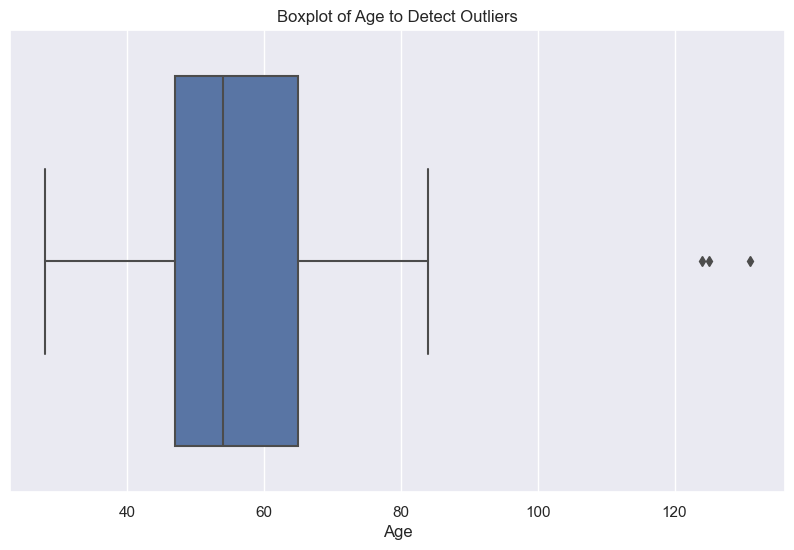

In [20]:
# Boxplot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age to Detect Outliers')
plt.xlabel('Age')
plt.show()

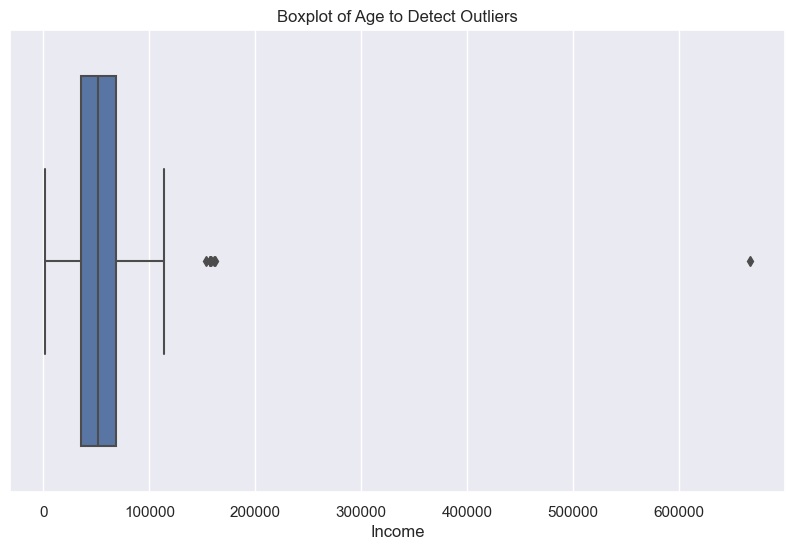

In [25]:
# Boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Income'])
plt.title('Boxplot of Age to Detect Outliers')
plt.xlabel('Income')
plt.show()

In [29]:
data= data[data['Age']<=100]
# Top Five income 
data['Income'].nlargest(5).unique().round(3)

array([666666., 162397., 160803., 157733., 157243.])

In [30]:
income_mean = data['Income'].mean()
max_income= data['Income'].max()
data['Income'] = data['Income'].replace(max_income,income_mean)

In [32]:
values=['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds']
data['Total_Spending']= data[values].sum(axis=1)


dempgraphic_info = data[['Age','Income','Kidhome','Teenhome','Marital_Status_Grouped']]
dempgraphic_info.describe()

Age         Income      Kidhome     Teenhome
count  2235.000000    2235.000000  2235.000000  2235.000000
mean     55.103803   51943.763184     0.444743     0.506935
std      11.693335   21406.496951     0.538544     0.544626
min      28.000000    1730.000000     0.000000     0.000000
25%      47.000000   35482.000000     0.000000     0.000000
50%      54.000000   51651.000000     0.000000     0.000000
75%      65.000000   68211.000000     1.000000     1.000000
max      84.000000  162397.000000     2.000000     2.000000

C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


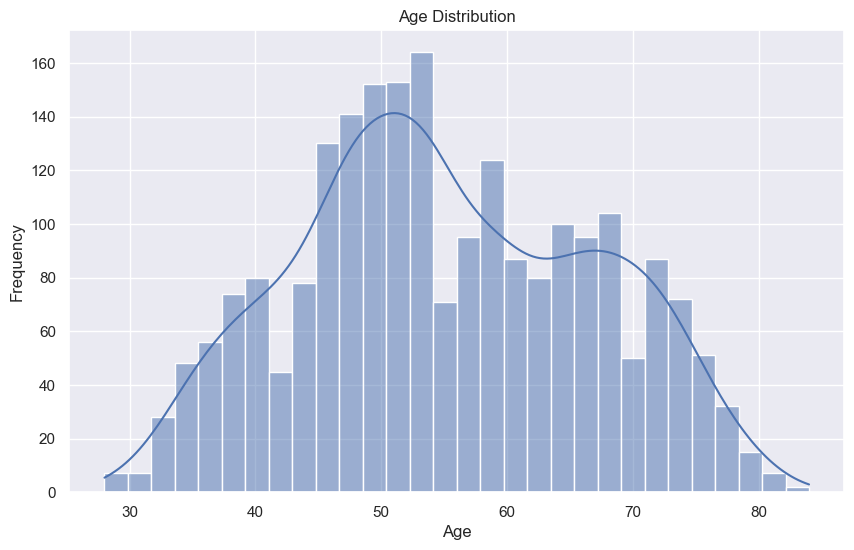

In [34]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


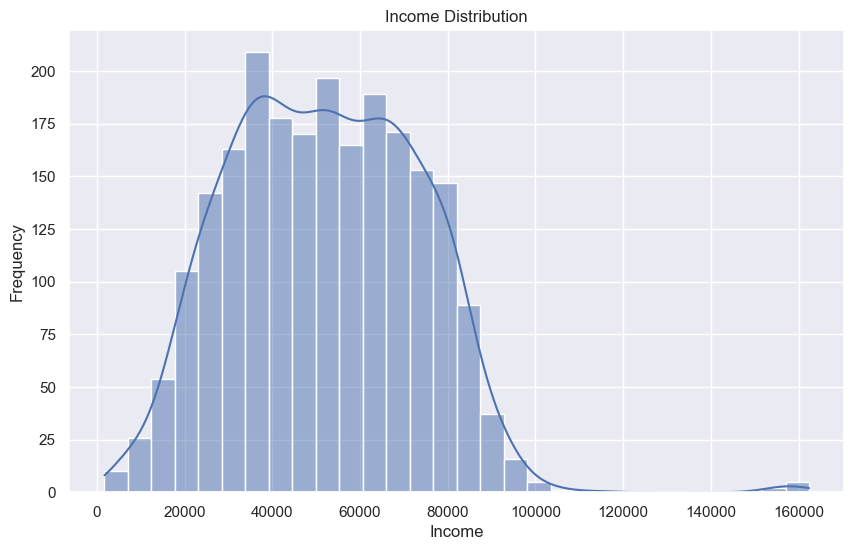

In [36]:
# Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [38]:
# Define bins for age group
bins =[28, 39, 54, 69, 84]
labels = ['Young Adults (28-39)', 'Middle-Aged Adults (40-54)', 'Older Adults (55-69)', 'Seniors (70-84)']

# create a new column 'Age_Group' by binning the age column
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest = True)

# Display new data column
data[['Age','Age_Group']]

Age                   Age_Group
0      67        Older Adults (55-69)
1      70             Seniors (70-84)
2      59        Older Adults (55-69)
3      40  Middle-Aged Adults (40-54)
4      43  Middle-Aged Adults (40-54)
...   ...                         ...
2235   57        Older Adults (55-69)
2236   78             Seniors (70-84)
2237   43  Middle-Aged Adults (40-54)
2238   68        Older Adults (55-69)
2239   70             Seniors (70-84)

[2235 rows x 2 columns]

In [39]:
data['Age_Group'].value_counts()

Age_Group
Middle-Aged Adults (40-54)    943
Older Adults (55-69)          756
Seniors (70-84)               316
Young Adults (28-39)          220
Name: count, dtype: int64

In [40]:
# Define bins for income 
income_bins =  [0, 40000, 90000, float('inf')]  # group income 
income_labels = ['Low Income', 'Middle Income', 'High Income']

# create new column income 
data['Income_Group']= pd.cut(data['Income'], bins=income_bins, labels = income_labels, right=True, include_lowest=True)

# Display the data frame 
data[['Income','Income_Group']]

Income   Income_Group
0     58138.0  Middle Income
1     46344.0  Middle Income
2     71613.0  Middle Income
3     26646.0     Low Income
4     58293.0  Middle Income
...       ...            ...
2235  61223.0  Middle Income
2236  64014.0  Middle Income
2237  56981.0  Middle Income
2238  69245.0  Middle Income
2239  52869.0  Middle Income

[2235 rows x 2 columns]

In [41]:
data['Income_Group'].value_counts()

Income_Group
Middle Income    1452
Low Income        731
High Income        52
Name: count, dtype: int64

In [42]:
# define mapping to education levels
Education_mapping = {
    'PhD' : 'Higher Education',
    'Master': 'Higher Education',
    '2n Cycle': 'Higher Education',
    'Graduation':'Undergraduate',
    'Basic': 'Secondary Education'
}

# create a new column by education mapping
data['Education_Group']= data['Education'].map(Education_mapping)

#Display the dataframe 
data[['Education','Education_Group']]


Education   Education_Group
0     Graduation     Undergraduate
1     Graduation     Undergraduate
2     Graduation     Undergraduate
3     Graduation     Undergraduate
4            PhD  Higher Education
...          ...               ...
2235  Graduation     Undergraduate
2236         PhD  Higher Education
2237  Graduation     Undergraduate
2238      Master  Higher Education
2239         PhD  Higher Education

[2235 rows x 2 columns]

In [43]:
data.describe()

Year_Birth         Income      Kidhome     Teenhome  \
count  2235.000000    2235.000000  2235.000000  2235.000000   
mean   1968.896197   51943.763184     0.444743     0.506935   
min    1940.000000    1730.000000     0.000000     0.000000   
25%    1959.000000   35482.000000     0.000000     0.000000   
50%    1970.000000   51651.000000     0.000000     0.000000   
75%    1977.000000   68211.000000     1.000000     1.000000   
max    1996.000000  162397.000000     2.000000     2.000000   
std      11.693335   21406.496951     0.538544     0.544626   

                         Dt_Customer      Recency        Wines       Fruits  \
count                           2235  2235.000000  2235.000000  2235.000000   
mean   2013-07-10 05:14:24.966443008    49.101119   303.949441    26.218345   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     1.000000   
50%              2013-07-08 00:00:00    49.000000   173.000000     8.000000   
75%              2013-12-30 00:00:00    74.000000   504.500000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.968411   336.703744    39.692041   

       MeatProducts  FishProducts  ...  AcceptedCmp1  AcceptedCmp2  \
count   2235.000000   2235.000000  ...   2235.000000   2235.000000   
mean     166.786577     37.372707  ...      0.063982      0.013423   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%       16.000000      3.000000  ...      0.000000      0.000000   
50%       67.000000     12.000000  ...      0.000000      0.000000   
75%      231.500000     50.000000  ...      0.000000      0.000000   
max     1725.000000    259.000000  ...      1.000000      1.000000   
std      225.650353     54.432264  ...      0.244776      0.115102   

          Complain  Z_CostContact  Z_Revenue     Response          Age  \
count  2235.000000         2235.0     2235.0  2235.000000  2235.000000   
mean      0.008949            3.0       11.0     0.148993    55.103803   
min       0.000000            3.0       11.0     0.000000    28.000000   
25%       0.000000            3.0       11.0     0.000000    47.000000   
50%       0.000000            3.0       11.0     0.000000    54.000000   
75%       0.000000            3.0       11.0     0.000000    65.000000   
max       1.000000            3.0       11.0     1.000000    84.000000   
std       0.094194            0.0        0.0     0.356162    11.693335   

       Tenure_Days  Tenure_Years  Total_Spending  
count  2235.000000   2235.000000     2235.000000  
mean   4147.781655     11.363785      605.218345  
min    3794.000000     10.394521        5.000000  
25%    3975.000000     10.890411       69.000000  
50%    4150.000000     11.369863      396.000000  
75%    4323.000000     11.843836     1043.500000  
max    4493.000000     12.309589     2525.000000  
std     202.145320      0.553823      601.853161  

[8 rows x 30 columns]

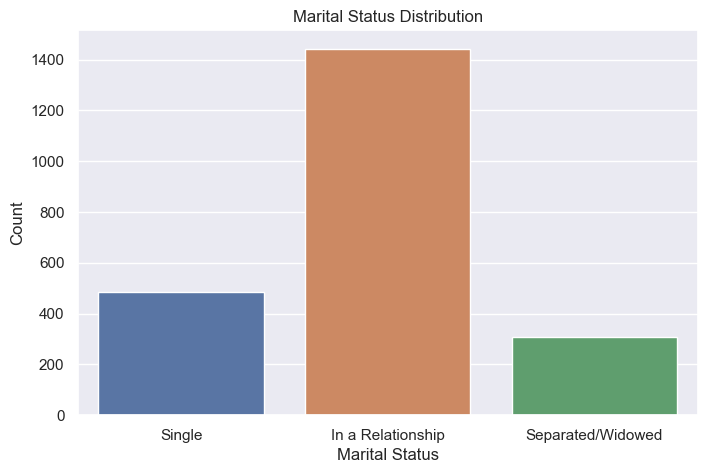

In [45]:
# Marital status count
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Marital_Status_Grouped')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


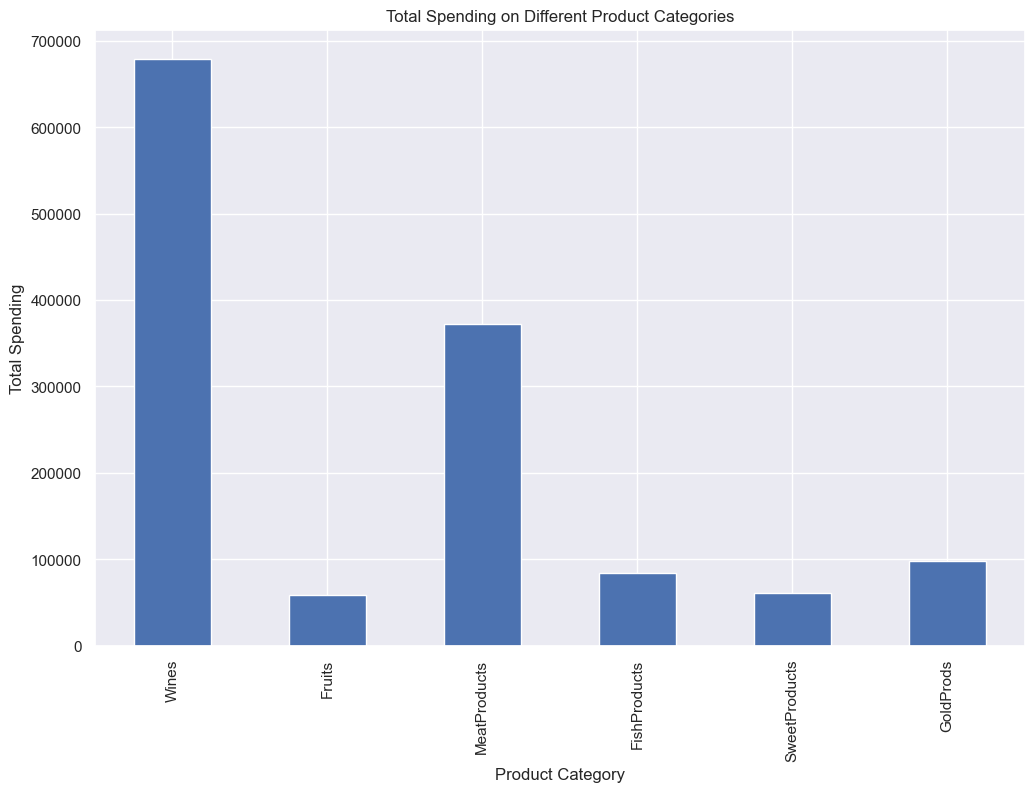

In [47]:
# Plotting spending on various product categories
plt.figure(figsize=(12, 8))
product_columns = ['Wines', 'Fruits', 'MeatProducts', 
                   'FishProducts', 'SweetProducts', 'GoldProds']

data[product_columns].sum().plot(kind='bar')
plt.title('Total Spending on Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()


In [48]:
product_categories=[ 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds']
#Total age group by product in percentage 

# Calculate total spending for each age group
total_spending = data.groupby('Age_Group')[product_categories].sum().sum(axis=1)

# Calculate percentages
each_cat =data.groupby('Age_Group')[product_categories].sum()

# Divide each product category spending by the total spending for each age group
percentages = each_cat.div(total_spending, axis=0)  # axis=0 ensures row-wise division

# Round the percentages to two decimal places
age_group_percentages = percentages.round(2)

# Print the resulting percentages
age_group_percentages


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\1989925343.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending = data.groupby('Age_Group')[product_categories].sum().sum(axis=1)
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\1989925343.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  each_cat =data.groupby('Age_Group')[product_categories].sum()


Wines  Fruits  MeatProducts  FishProducts  \
Age_Group                                                               
Young Adults (28-39)         0.42    0.05          0.34          0.06   
Middle-Aged Adults (40-54)   0.48    0.05          0.28          0.07   
Older Adults (55-69)         0.53    0.04          0.26          0.06   
Seniors (70-84)              0.53    0.04          0.26          0.06   

                            SweetProducts  GoldProds  
Age_Group                                             
Young Adults (28-39)                 0.05       0.07  
Middle-Aged Adults (40-54)           0.05       0.08  
Older Adults (55-69)                 0.04       0.07  
Seniors (70-84)                      0.04       0.07

In [49]:
#Education group by  product categories in percentage 

# Calculate total spending for each age group
total_spending = data.groupby('Education_Group')[product_categories].sum().sum(axis=1)

# Calculate percentages
each_cat =data.groupby('Education_Group')[product_categories].sum()

# Divide each product category spending by the total spending for each education group
percentages = each_cat.div(total_spending, axis=0)  # axis=0 ensures row-wise division

# Round the percentages to two decimal places
education_group_percentages = percentages.round(2)

# Print the resulting percentages
education_group_percentages


Wines  Fruits  MeatProducts  FishProducts  SweetProducts  \
Education_Group                                                                 
Higher Education      0.55    0.04          0.26          0.05           0.04   
Secondary Education   0.09    0.14          0.14          0.21           0.15   
Undergraduate         0.46    0.05          0.29          0.07           0.05   

                     GoldProds  
Education_Group                 
Higher Education          0.06  
Secondary Education       0.28  
Undergraduate             0.08

In [50]:
#  income group by  product categories in percentage 

# Calculate total spending for each income group
total_spending = data.groupby('Income_Group')[product_categories].sum().sum(axis=1)

# Calculate percentages
each_cat =data.groupby('Income_Group')[product_categories].sum()

# Divide each product category spending by the total spending for each income group
percentages = each_cat.div(total_spending, axis=0)*100  # axis=0 ensures row-wise division

# Round the percentages to two decimal places
income_group_percentages = percentages.round(2)

# Print the resulting percentages
income_group_percentages 


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3375609880.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending = data.groupby('Income_Group')[product_categories].sum().sum(axis=1)
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3375609880.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  each_cat =data.groupby('Income_Group')[product_categories].sum()


Wines  Fruits  MeatProducts  FishProducts  SweetProducts  \
Income_Group                                                              
Low Income     31.87    6.30         27.07          9.68           6.39   
Middle Income  51.67    4.27         26.84          6.03           4.35   
High Income    44.44    3.63         38.21          5.45           4.72   

               GoldProds  
Income_Group              
Low Income         18.70  
Middle Income       6.84  
High Income         3.55

In [51]:
#  marital status group by  product categories in percentage 

# Calculate total spending for each income group
total_spending = data.groupby('Marital_Status_Grouped')[product_categories].sum().sum(axis=1)

# Calculate percentages
each_cat =data.groupby('Marital_Status_Grouped')[product_categories].sum()

# Divide each product category spending by the total spending for each income group
percentages = each_cat.div(total_spending, axis=0)*100  # axis=0 ensures row-wise division

# Round the percentages to two decimal places
marital_status_percentages = percentages.round(2)

# Print the resulting percentages
marital_status_percentages 


Wines  Fruits  MeatProducts  FishProducts  \
Marital_Status_Grouped                                              
In a Relationship       50.61    4.27         27.37          6.16   
Separated/Widowed       52.29    4.49         24.90          6.09   
Single                  47.69    4.41         29.92          6.28   

                        SweetProducts  GoldProds  
Marital_Status_Grouped                            
In a Relationship                4.43       7.16  
Separated/Widowed                4.65       7.60  
Single                           4.48       7.23

### Create four stack bar charts (For Education, Income, Marital status and Age groups)

C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3269954775.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(education_groups, rotation=45)
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3269954775.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(income_groups, rotation=45)
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3269954775.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(marital_status_groups, rotation=45)
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3269954775.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(age_groups, rotation=45)


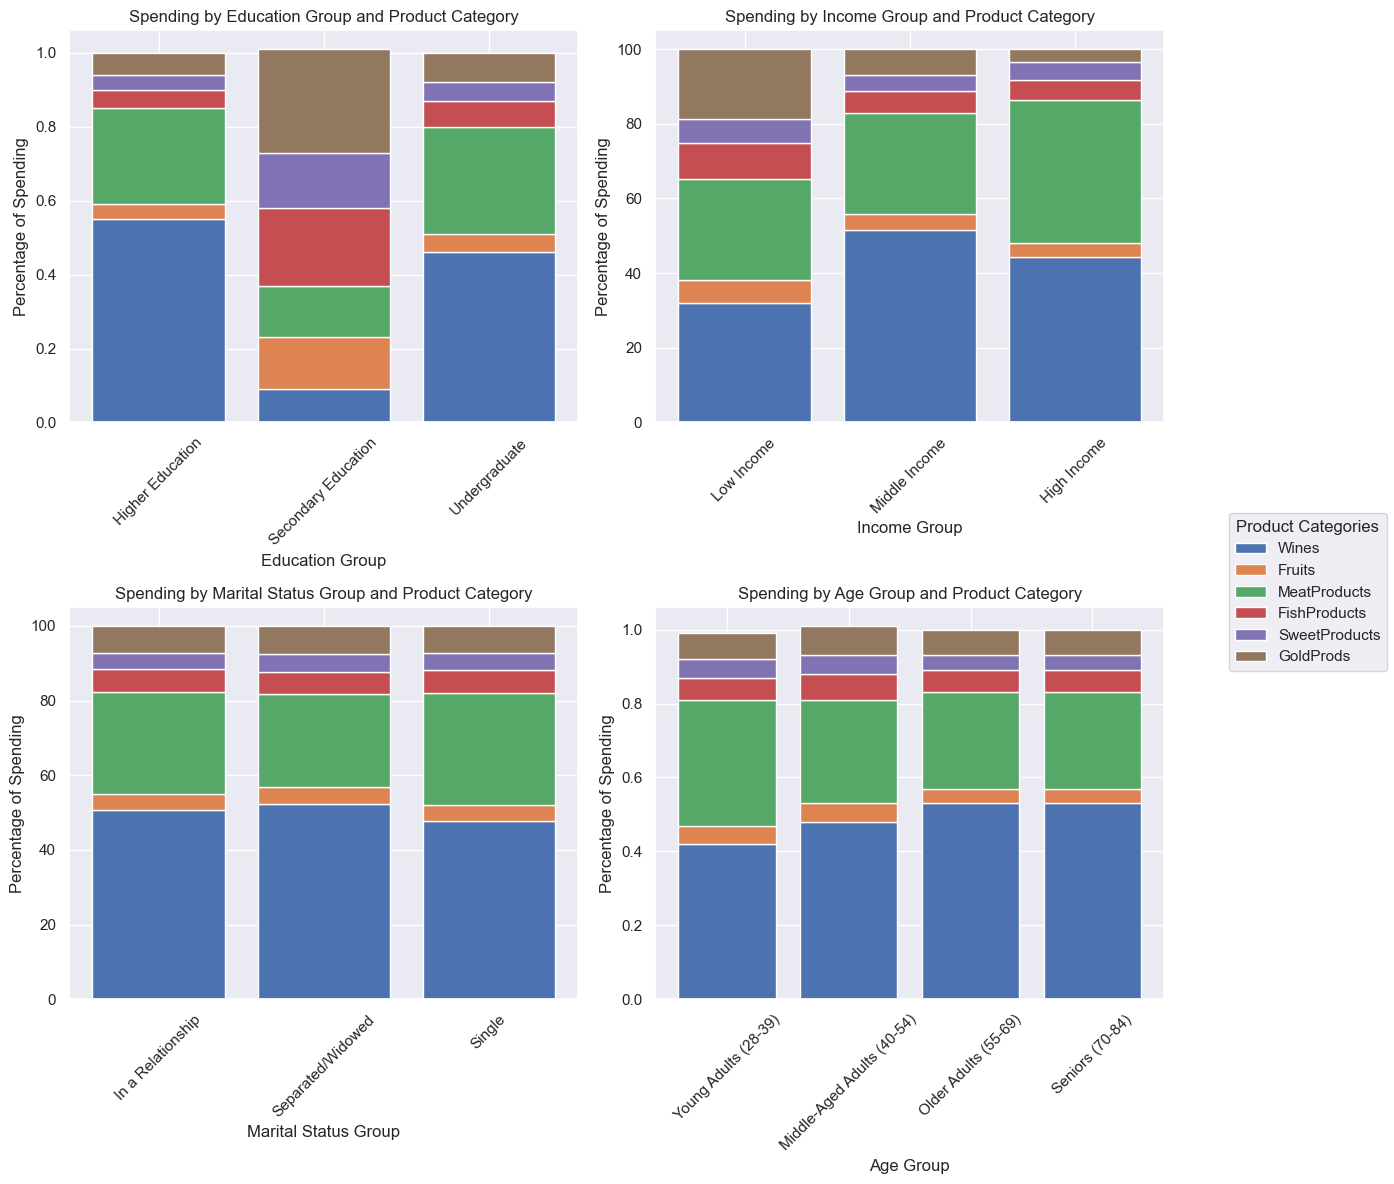

In [53]:
# Assuming the 'education_group_percentages', 'income_group_percentages', 'marital_status_percentages', and 'age_group_percentages' DataFrames are already created

# Define the groups and product categories for each
education_groups = education_group_percentages.index
income_groups = income_group_percentages.index
marital_status_groups = marital_status_percentages.index
age_groups = age_group_percentages.index
product_categories = education_group_percentages.columns

# Create a figure with four subplots (2 rows, 2 columns)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# Plotting for Education Group (Top-left plot)
bottom_values = np.zeros(len(education_groups))
for category in product_categories:
    ax1.bar(education_groups, education_group_percentages[category], bottom=bottom_values, label=category)
    bottom_values += education_group_percentages[category]

ax1.set_xlabel('Education Group')
ax1.set_ylabel('Percentage of Spending')
ax1.set_title('Spending by Education Group and Product Category')
ax1.set_xticklabels(education_groups, rotation=45)


# Plotting for Income Group (Top-right plot)
bottom_values = np.zeros(len(income_groups))
for category in product_categories:
    ax2.bar(income_groups, income_group_percentages[category], bottom=bottom_values, label=category)
    bottom_values += income_group_percentages[category]

ax2.set_xlabel('Income Group')
ax2.set_ylabel('Percentage of Spending')
ax2.set_title('Spending by Income Group and Product Category')
ax2.set_xticklabels(income_groups, rotation=45)

# Plotting for Marital Status Group (Bottom-left plot)
bottom_values = np.zeros(len(marital_status_groups))
for category in product_categories:
    ax3.bar(marital_status_groups, marital_status_percentages[category], bottom=bottom_values, label=category)
    bottom_values += marital_status_percentages[category]

ax3.set_xlabel('Marital Status Group')
ax3.set_ylabel('Percentage of Spending')
ax3.set_title('Spending by Marital Status Group and Product Category')
ax3.set_xticklabels(marital_status_groups, rotation=45)

# Plotting for Age Group (Bottom-right plot)
bottom_values = np.zeros(len(age_groups))
for category in product_categories:
    ax4.bar(age_groups, age_group_percentages[category], bottom=bottom_values, label=category)
    bottom_values += age_group_percentages[category]

ax4.set_xlabel('Age Group')
ax4.set_ylabel('Percentage of Spending')
ax4.set_title('Spending by Age Group and Product Category')
ax4.set_xticklabels(age_groups, rotation=45)


# Step 7: Add a legend outside the first subplot
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', title='Product Categories')

# Step 8: Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the legend

# Show the plot
plt.show()

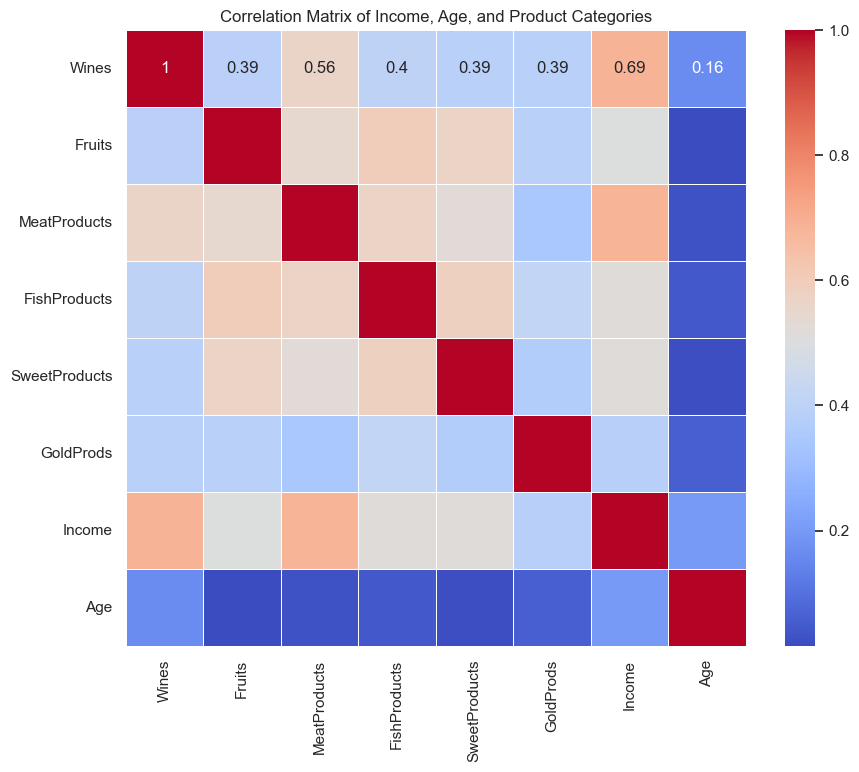

In [55]:
# correlation between incomea, Age and product Categories 

# selected columns 
columns_to_analyze=['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds','Income','Age']

correlation_matrix= data[columns_to_analyze].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Income, Age, and Product Categories')
plt.show()

## Perform ANOVA to test if there are significant differences in spending across demographic groups

In [56]:
# Spending categories
spending_categories = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds']

# Dictionary to store ANOVA results
anova_results = []

# Significance level (typically 0.05)
significance_level = 0.05

# Perform ANOVA and store results
for category in spending_categories:
    # ANOVA by Age Group
    groups_age = [group[category].values for name, group in data.groupby('Age_Group')]
    age_anova = f_oneway(*groups_age)
    anova_results.append({
        'Category_Demographic': f'{category}_Age',
        'F-statistic': age_anova.statistic,
        'p-value': age_anova.pvalue,
        'Significant': 'Yes' if age_anova.pvalue < significance_level else 'No'
    })
    
    # ANOVA by Education Level
    groups_education = [group[category].values for name, group in data.groupby('Education_Group')]
    education_anova = f_oneway(*groups_education)
    anova_results.append({
        'Category_Demographic': f'{category}_Education',
        'F-statistic': education_anova.statistic,
        'p-value': education_anova.pvalue,
        'Significant': 'Yes' if education_anova.pvalue < significance_level else 'No'
    })
    
    # ANOVA by Marital Status
    groups_marital = [group[category].values for name, group in data.groupby('Marital_Status_Grouped')]
    marital_anova = f_oneway(*groups_marital)
    anova_results.append({
        'Category_Demographic': f'{category}_Marital_Status',
        'F-statistic': marital_anova.statistic,
        'p-value': marital_anova.pvalue,
        'Significant': 'Yes' if marital_anova.pvalue < significance_level else 'No'
    })
    
    # ANOVA by Income Group
    groups_income = [group[category].values for name, group in data.groupby('Income_Group')]
    income_anova = f_oneway(*groups_income)
    anova_results.append({
        'Category_Demographic': f'{category}_Income',
        'F-statistic': income_anova.statistic,
        'p-value': income_anova.pvalue,
        'Significant': 'Yes' if income_anova.pvalue < significance_level else 'No'
    })

# Convert the results into a DataFrame
anova_df = pd.DataFrame(anova_results)

# Save the ANOVA results to an Excel file
#anova_df.to_excel('anova_results_with_significance.xlsx', index=False)

# Optionally, you can also save it to a CSV file if needed
# anova_df.to_csv('anova_results_with_significance.csv', index=False)

print("ANOVA results with significance saved successfully.")

ANOVA results with significance saved successfully.


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3026154986.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_age = [group[category].values for name, group in data.groupby('Age_Group')]
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3026154986.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_income = [group[category].values for name, group in data.groupby('Income_Group')]
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3026154986.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 

## Examine the Effect of family structure on spending

In [59]:
# check where rows combined kidhome and teenhome is greater or equal to 3
data['total_home']=data['Kidhome'] + data['Teenhome']
rows_with_max_3 = data[data['total_home']>=3] # filter rows with people mpre than 3 
rows_with_max_3

Year_Birth   Education Marital_Status        Income  Kidhome  Teenhome  \
48          1951  Graduation         Single  52247.251354        2         1   
69          1970  Graduation       Together  74854.000000        1         2   
90          1957         PhD        Married  52247.251354        2         1   
137         1959         PhD        Married  33762.000000        2         1   
148         1973    2n Cycle        Married  35688.000000        2         1   
157         1978  Graduation         Single  60199.000000        1         2   
160         1958      Master         Single  30523.000000        2         1   
165         1966  Graduation       Together  43482.000000        2         1   
178         1959  Graduation       Together  38285.000000        2         1   
216         1978    2n Cycle         Single  52195.000000        2         1   
259         1957         PhD         Single  40737.000000        2         1   
311         1967  Graduation        Married  22574.000000        2         1   
319         1970  Graduation         Single  52247.251354        1         2   
328         1950         PhD        Married  54432.000000        2         1   
383         1973    2n Cycle        Married  35688.000000        2         1   
404         1955         PhD         Single  55521.000000        1         2   
425         1953  Graduation        Married  48686.000000        1         2   
455         1972  Graduation        Married  38988.000000        1         2   
607         1956  Graduation       Divorced  26150.000000        2         1   
613         1967  Graduation        Married  22574.000000        2         1   
616         1965      Master         Single  35791.000000        2         1   
635         1962  Graduation       Divorced  46102.000000        2         1   
659         1966         PhD         Single  46734.000000        1         2   
728         1965      Master        Married  56962.000000        2         1   
733         1948         PhD       Divorced  45072.000000        1         2   
742         1950         PhD         Single  48767.000000        1         2   
826         1954  Graduation        Married  93404.000000        1         2   
827         1962  Graduation       Divorced  37859.000000        1         2   
886         1953         PhD         Single  46231.000000        2         1   
904         1969  Graduation       Together  58917.000000        1         2   
971         1968         PhD       Together  40706.000000        2         1   
977         1965      Master        Married  56962.000000        2         1   
1022        1953         PhD       Together  64504.000000        1         2   
1127        1977  Graduation       Together  46931.000000        2         1   
1167        1968  Graduation       Together  35322.000000        1         2   
1241        1967         PhD        Married  59062.000000        2         1   
1277        1964  Graduation        Married  40800.000000        1         2   
1372        1965      Master         Single  35791.000000        2         1   
1376        1975  Graduation         Single  56243.000000        1         2   
1418        1972  Graduation        Married  36026.000000        2         1   
1420        1972         PhD       Together  34578.000000        2         1   
1487        1946         PhD       Together  64014.000000        2         1   
1543        1953         PhD         Single  51411.000000        1         2   
1558        1961  Graduation       Divorced  27215.000000        2         1   
1569        1957         PhD        Married  75283.000000        1         2   
1580        1956  Graduation       Together  34633.000000        2         1   
1856        1951      Master         Single  58217.000000        2         1   
2019        1972  Graduation       Together  30261.000000        1         2   
2041        1970  Graduation         Single  83273.000000        1         2   
2129  

In [60]:
product_categories
# defien a function to classify each row based on the new conditions 
def determine_family_structure(row):
    if row ['Kidhome'] == 0 and row['Teenhome']==0:
        return 'No Kids or Teen'
    elif row['Kidhome'] >0 and row['Teenhome']==0:
        return 'With kids'
    elif row['Teenhome'] >0 and row['Kidhome']==0:
        return 'Teen Only'
    elif row['Kidhome']>0 and row['Teenhome']>0:
        return 'With kids'
    else:
        return 'Other Cases' 

In [65]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Tenure_Days', 'Tenure_Years',
       'Marital_Status_Grouped', 'Total_Spending', 'Age_Group', 'Income_Group',
       'Education_Group', 'total_home'],
      dtype='object')

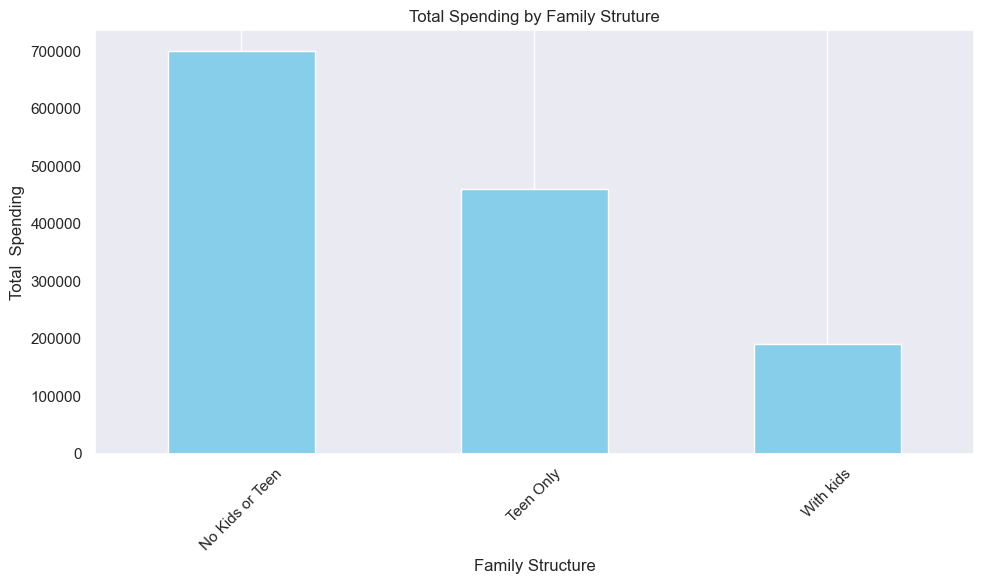

In [68]:
# Plot Family Structure by Total Spending 
total_spending_by_family_structure = data.groupby('Family_Structure')['Total_Spending'].sum()

# Plot total spending by family struture 
plt.figure(figsize=(10,6))
total_spending_by_family_structure.plot(kind='bar',color='skyblue')
plt.title('Total Spending by Family Struture')
plt.xlabel('Family Structure')
plt.ylabel('Total  Spending')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

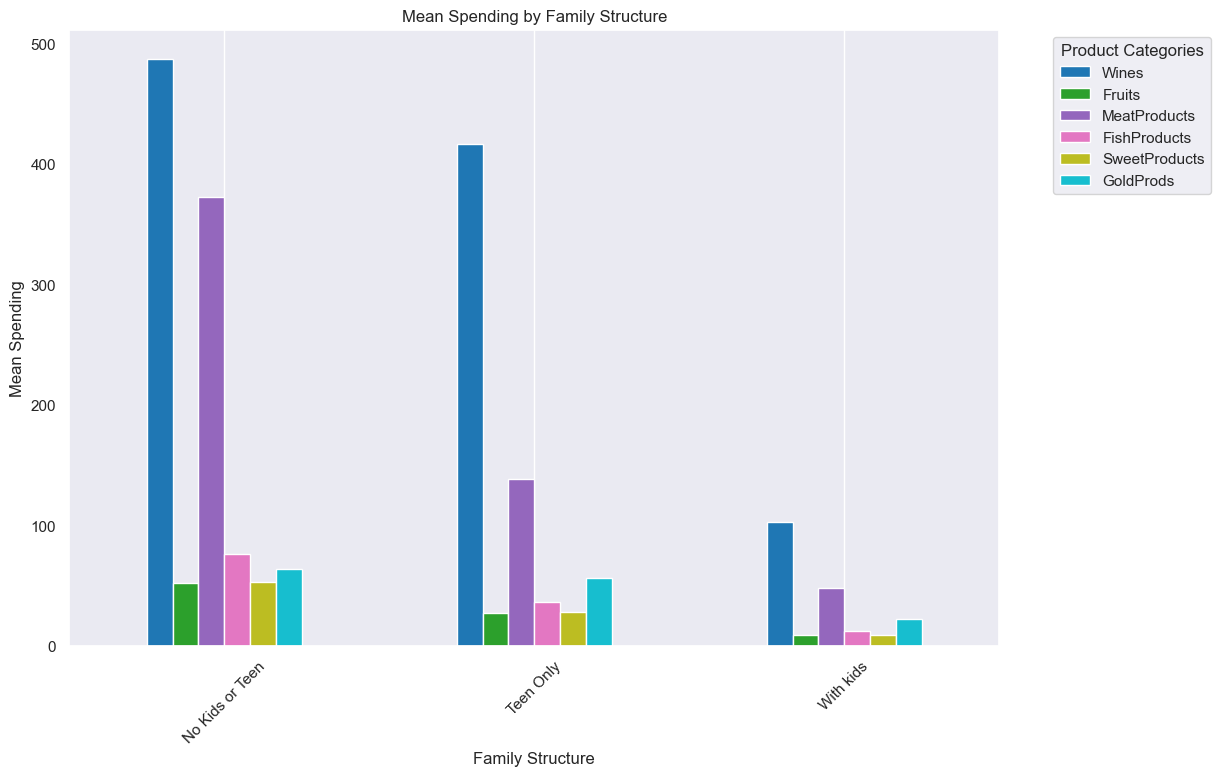

In [67]:
# Apply the classification function to each row  and create new column 
data['Family_Structure']= data.apply(determine_family_structure,axis=1)

#Calculate mean spending for each family structure
mean_spending_by_family_structure= data.groupby('Family_Structure')[product_categories].mean()

# Plotting the mean spending by family structure
plt.figure(figsize=(12, 8))
mean_spending_by_family_structure.plot(kind='bar', figsize=(12, 8), colormap='tab10')
plt.title('Mean Spending by Family Structure')
plt.xlabel('Family Structure')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

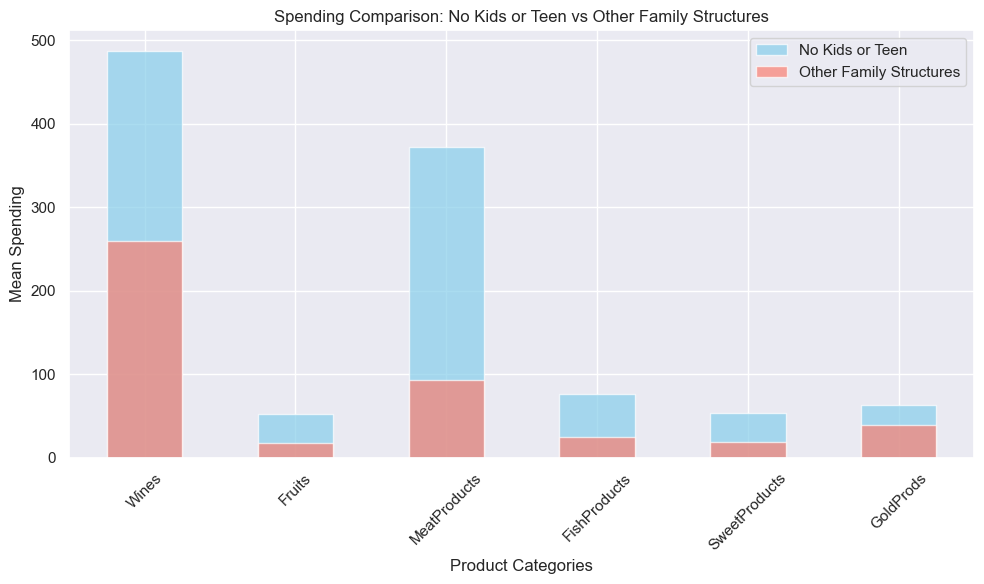

In [69]:
# Extracting spending for 'No Kids or Teen' and comparing it with other groups
no_kids_or_teen_spending = mean_spending_by_family_structure.loc['No Kids or Teen']
comparison_spending = mean_spending_by_family_structure.drop('No Kids or Teen')

# Plotting the spending comparison
plt.figure(figsize=(10, 6))

# Plotting No Kids or Teen spending
no_kids_or_teen_spending.plot(kind='bar', color='skyblue', alpha=0.7, label='No Kids or Teen')

# Plotting the mean spending of other family structures
comparison_spending.mean().plot(kind='bar', color='salmon', alpha=0.7, label='Other Family Structures')

plt.title('Spending Comparison: No Kids or Teen vs Other Family Structures')
plt.xlabel('Product Categories')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
# Investigate Spending  by product categories for No kids or teen
mean_spending_by_family_structure.loc['No Kids or Teen']
comparison_spending

Wines    Fruits  MeatProducts  FishProducts  \
Family_Structure                                                     
Teen Only         416.602446  26.80581    138.665138     36.351682   
With kids         102.995772   8.43129     48.142706     12.084567   

                  SweetProducts  GoldProds  
Family_Structure                            
Teen Only             28.305810  56.114679  
With kids              8.723044  22.152220

In [72]:
# perform an ANOVA test..
anova_results = {}
for category in product_categories:
    groups = [group[category].values for name, group in data.groupby('Family_Structure')]
    anova_results[category] = f_oneway(*groups)
    # Display ANOVA results
for category, result in anova_results.items():
    print(f"ANOVA for {category}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

ANOVA for Wines: F-statistic = 408.37, p-value = 0.0000
ANOVA for Fruits: F-statistic = 289.66, p-value = 0.0000
ANOVA for MeatProducts: F-statistic = 621.91, p-value = 0.0000
ANOVA for FishProducts: F-statistic = 343.52, p-value = 0.0000
ANOVA for SweetProducts: F-statistic = 273.53, p-value = 0.0000
ANOVA for GoldProds: F-statistic = 168.56, p-value = 0.0000


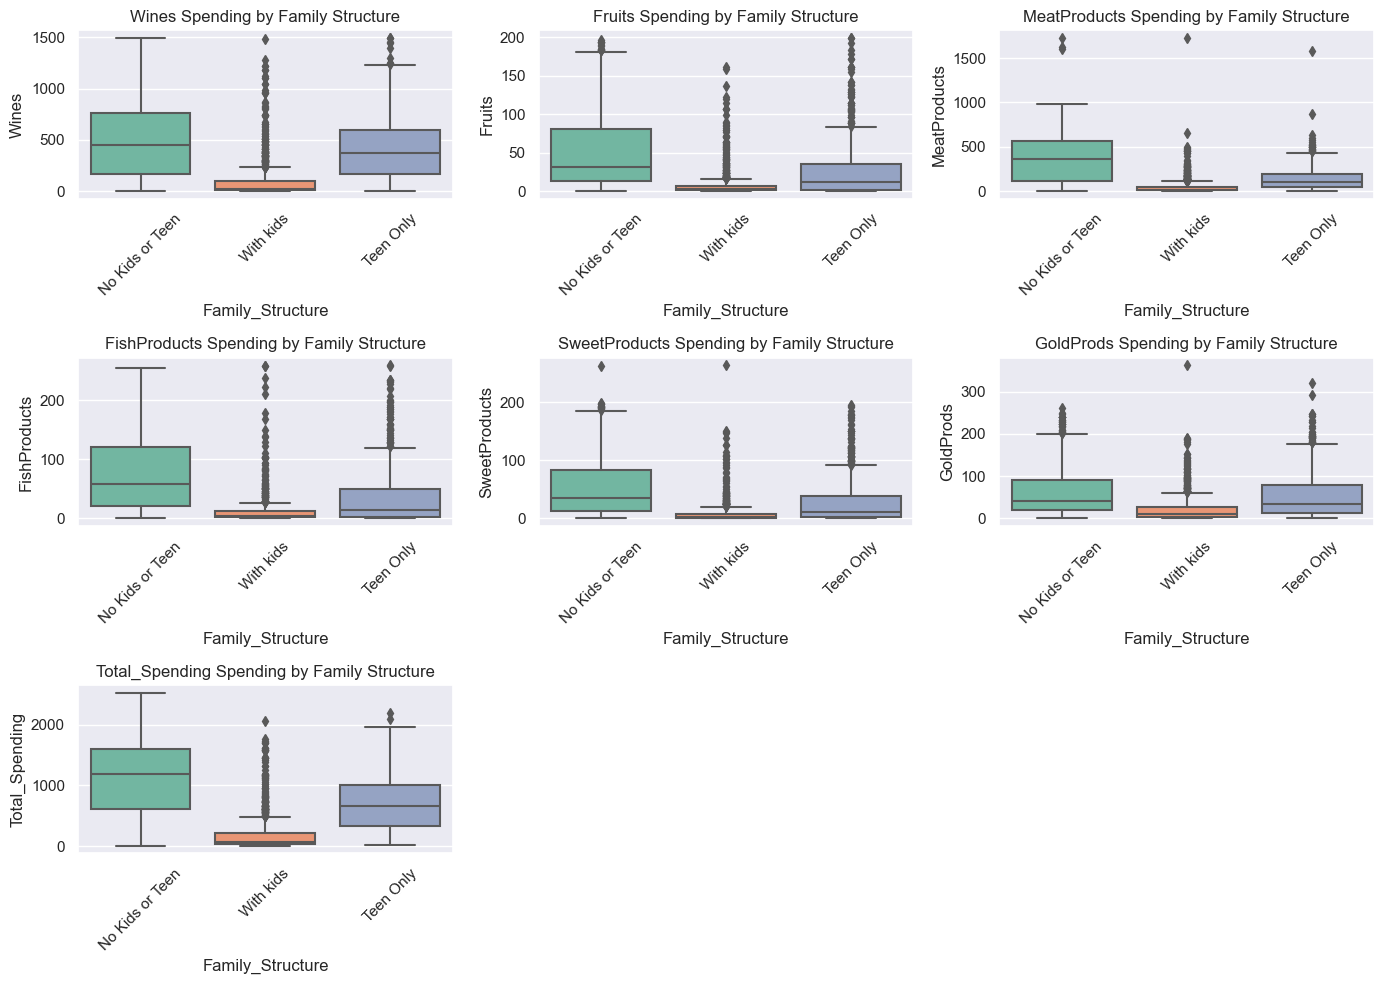

In [73]:
# Step 3: Calculate mean and median spending for each family structure
mean_spending = data.groupby('Family_Structure')[product_categories].mean()
median_spending = data.groupby('Family_Structure')[product_categories].median()

# Step 4: Visualize spending distribution for each category by family structure using box plots
plt.figure(figsize=(14, 10))
spending_categories = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds', 'Total_Spending']

for i, category in enumerate(spending_categories, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Family_Structure', y=category, data=data, palette='Set2')
    plt.title(f'{category} Spending by Family Structure')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [76]:
# Run Tukey's HSD test for each spending category
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for each category
tukey_results = {}
for category in product_categories:
    tukey = pairwise_tukeyhsd(endog=data[category], groups=data['Family_Structure'], alpha=0.05)
    tukey_results[category] = tukey

# Display Tukey's HSD results
for category, result in tukey_results.items():
    print(f"Tukey's HSD for {category}:\n{result}\n")

Tukey's HSD for Wines:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1       group2   meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------
No Kids or Teen Teen Only  -70.6968   0.0 -108.3561  -33.0374   True
No Kids or Teen With kids -384.3034   0.0 -418.9816 -349.6253   True
      Teen Only With kids -313.6067   0.0 -347.9821 -279.2313   True
--------------------------------------------------------------------

Tukey's HSD for Fruits:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
No Kids or Teen Teen Only  -25.306   0.0 -29.9291 -20.6829   True
No Kids or Teen With kids -43.6805   0.0 -47.9376 -39.4234   True
      Teen Only With kids -18.3745   0.0 -22.5945 -14.1546   True
-----------------------------------------------------------------

Tukey'

C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


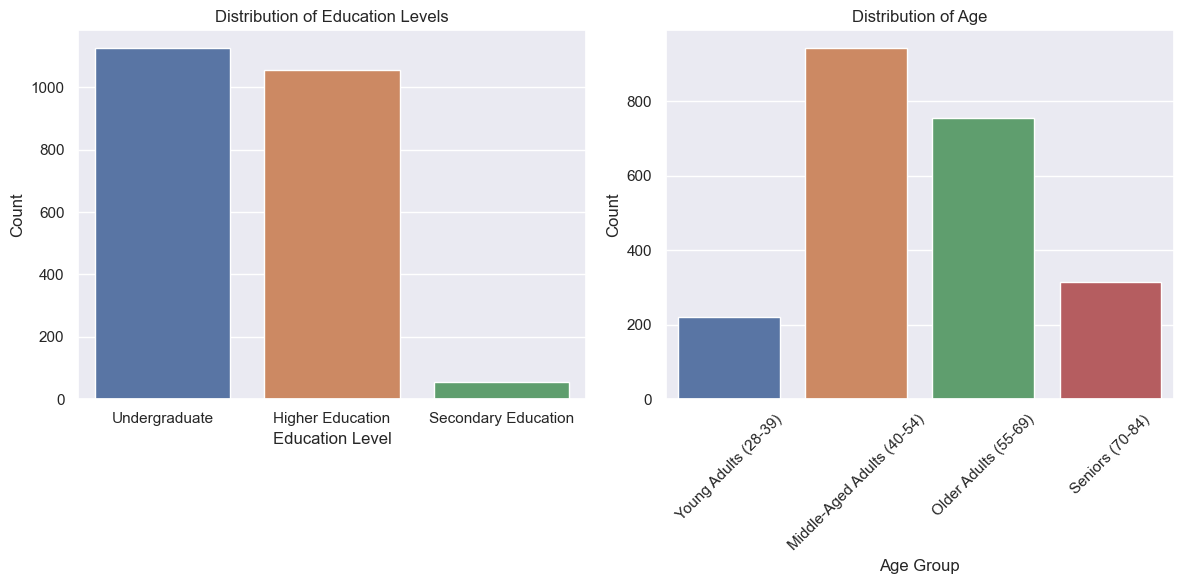

In [77]:
# create the figure and the subplots (1 row and 2 columns)
fig, ax=plt.subplots(1,2,figsize=(12,6))

# Subplot Education group count 
sns.countplot(x='Education_Group', data=data, ax=ax[0])
ax[0].set_title('Distribution of Education Levels')
ax[0].set_xlabel('Education Level')
ax[0].set_ylabel('Count')

# subplot Age group distirbution
sns.countplot(x='Age_Group',data=data,ax=ax[1])
ax[1].set_title('Distribution of Age')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45) #

#Adjust layout to prevent overlap
plt.tight_layout()

#show plot 
plt.show()



C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


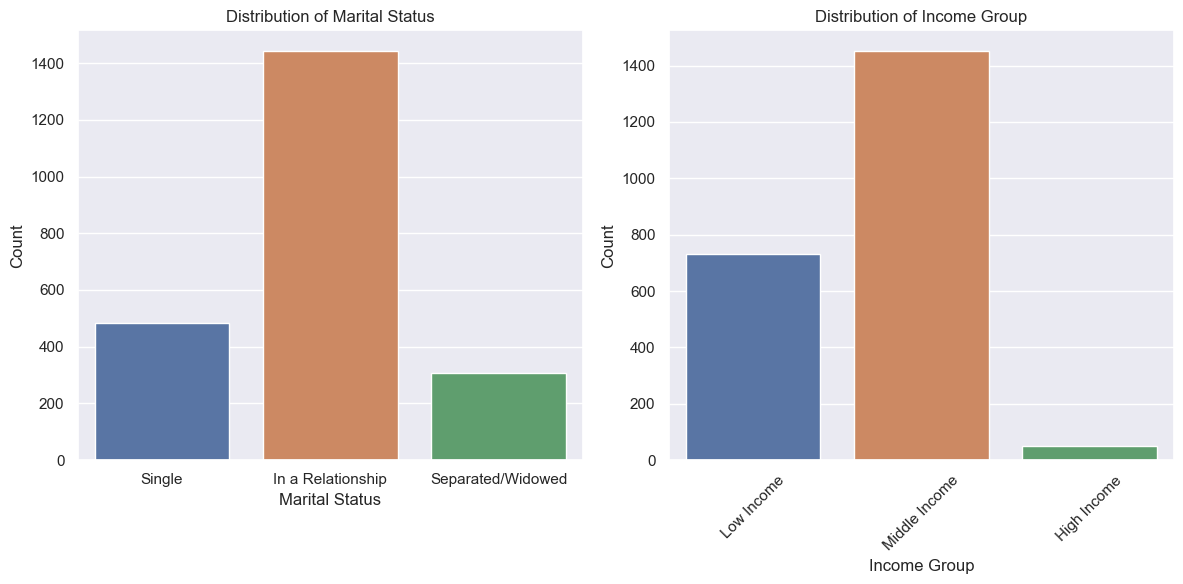

In [78]:
fig, ax=plt.subplots(1,2,figsize=(12,6))

# Subplot Education group count 
sns.countplot(x='Marital_Status_Grouped', data=data, ax=ax[0])
ax[0].set_title('Distribution of Marital Status')
ax[0].set_xlabel('Marital Status')
ax[0].set_ylabel('Count')

# subplot Age group distirbution
sns.countplot(x='Income_Group',data=data,ax=ax[1])
ax[1].set_title('Distribution of Income Group')
ax[1].set_xlabel('Income Group')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45) #

#Adjust layout to prevent overlap
plt.tight_layout()

#show plot 
plt.show()

C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


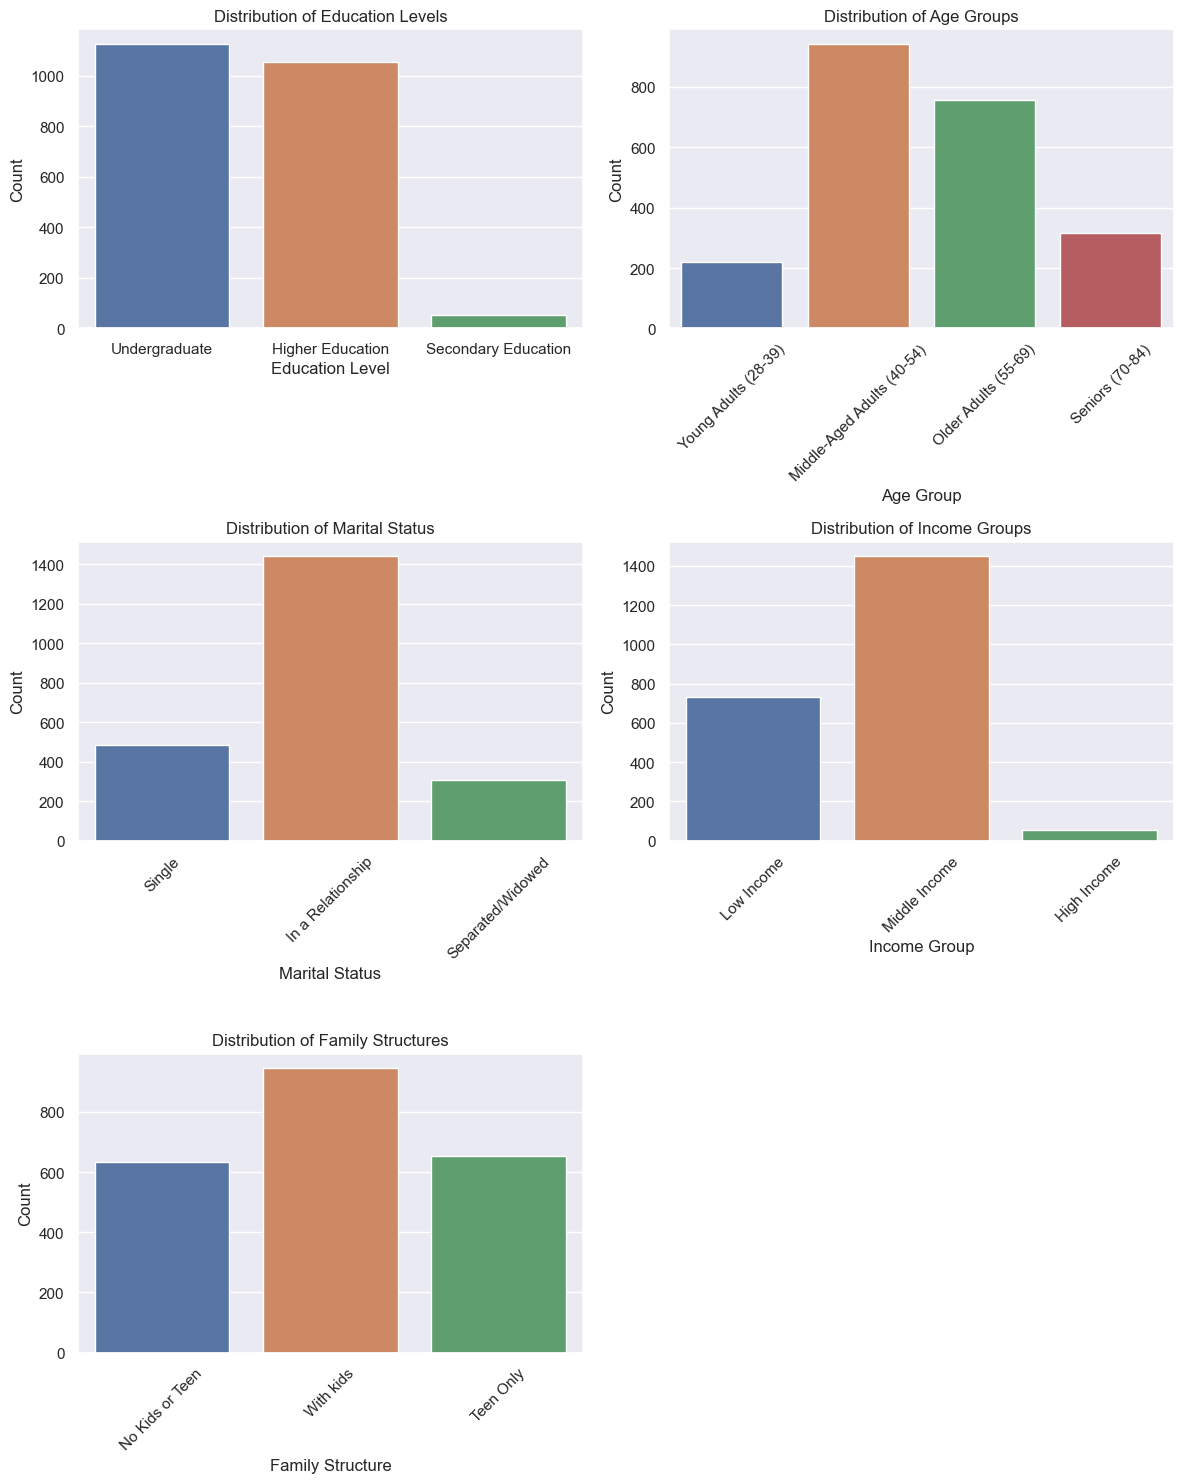

In [79]:
# Create the figure and the subplots (3 rows, 2 columns)
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

# Subplot 1: Education Group Count Plot
sns.countplot(x='Education_Group', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Education Levels')
ax[0, 0].set_xlabel('Education Level')
ax[0, 0].set_ylabel('Count')

# Subplot 2: Age Group Count Plot with rotated labels
sns.countplot(x='Age_Group', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Age Groups')
ax[0, 1].set_xlabel('Age Group')
ax[0, 1].set_ylabel('Count')
ax[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Marital Status Count Plot with rotated labels
sns.countplot(x='Marital_Status_Grouped', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Marital Status')
ax[1, 0].set_xlabel('Marital Status')
ax[1, 0].set_ylabel('Count')
ax[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Income Group Count Plot with rotated labels
sns.countplot(x='Income_Group', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Income Groups')
ax[1, 1].set_xlabel('Income Group')
ax[1, 1].set_ylabel('Count')
ax[1, 1].tick_params(axis='x', rotation=45)

# Subplot 5: Family Structure Count Plot with rotated labels
sns.countplot(x='Family_Structure', data=data, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of Family Structures')
ax[2, 0].set_xlabel('Family Structure')
ax[2, 0].set_ylabel('Count')
ax[2, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot (since we have 5 plots but a 3x2 grid)
fig.delaxes(ax[2, 1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [81]:

select_col=['Total_Spending','Age','Tenure_Days','Income','Recency']
summary=data[select_col].describe()
summary.to_csv("Summary statistics.csv")
summary

Total_Spending          Age  Tenure_Days         Income      Recency
count     2235.000000  2235.000000  2235.000000    2235.000000  2235.000000
mean       605.218345    55.103803  4147.781655   51943.763184    49.101119
std        601.853161    11.693335   202.145320   21406.496951    28.968411
min          5.000000    28.000000  3794.000000    1730.000000     0.000000
25%         69.000000    47.000000  3975.000000   35482.000000    24.000000
50%        396.000000    54.000000  4150.000000   51651.000000    49.000000
75%       1043.500000    65.000000  4323.000000   68211.000000    74.000000
max       2525.000000    84.000000  4493.000000  162397.000000    99.000000

# Understand the role of customer Tenure and Recency 

In [83]:
data['Recency_Segment']= pd.cut(data['Recency'],bins=[0,30,60,99],
                             labels=['Recent','Mid-Recency','Inactive'])  # labels for Rencey 

data['Tenure_Segment']=pd.cut(data['Tenure_Years'], bins=[9, 11, 13],labels=['Low Tenure', 'High Tenure']) # labels for Tenure

In [84]:
# Analyze the spending partten for recency and tenure 
spending_categories= ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds', 'Total_Spending']
mean_spending_by_tenure =data.groupby('Tenure_Segment')[spending_categories].mean()
mean_spending_by_recency = data.groupby('Recency_Segment')[spending_categories].mean()

C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2220667586.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_tenure =data.groupby('Tenure_Segment')[spending_categories].mean()
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2220667586.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_recency = data.groupby('Recency_Segment')[spending_categories].mean()


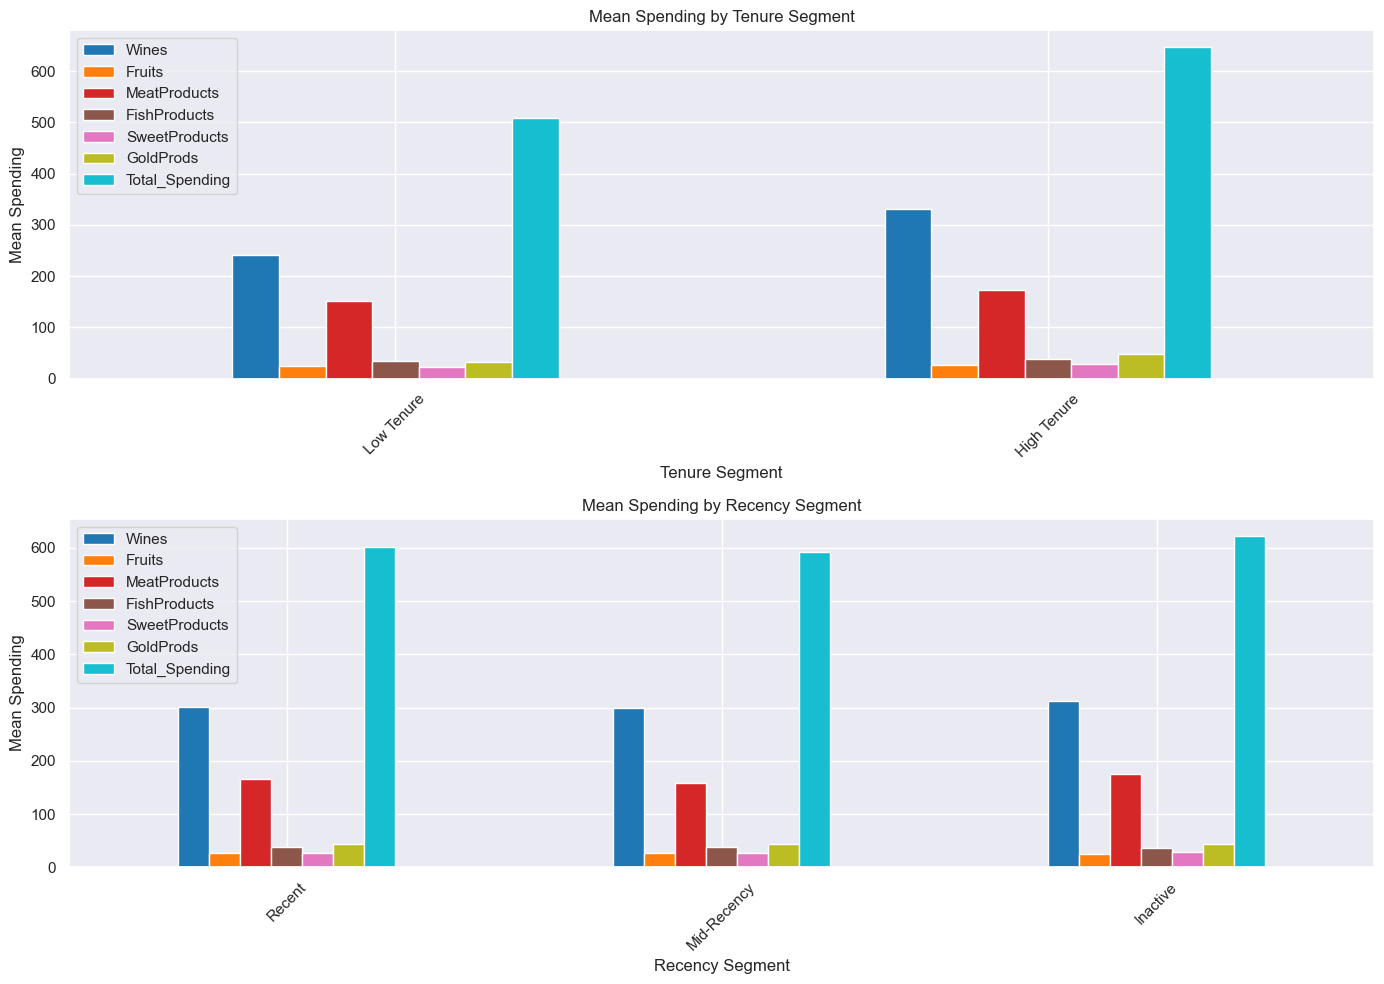

In [85]:
# plot for rencency and tenure 
plt.figure(figsize=(14, 10))
 
# Bar plot for spending by tenure
plt.subplot(2, 1, 1)
mean_spending_by_tenure.plot(kind='bar', ax=plt.gca(), colormap='tab10')
plt.title('Mean Spending by Tenure Segment')
plt.xlabel('Tenure Segment')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45)


# Bar plot for spending by recency
plt.subplot(2, 1, 2)
mean_spending_by_recency.plot(kind='bar', ax=plt.gca(), colormap='tab10')
plt.title('Mean Spending by Recency Segment')
plt.xlabel('Recency Segment')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [86]:
# Perform ANOVA to test if there are significant differences in spending based on Tenure and Recency
anova_results_tenure = {}
anova_results_recency = {}

for category in ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds', 'Total_Spending']:
    # ANOVA by Tenure Segment
    groups_tenure = [group[category].values for name, group in data.groupby('Tenure_Segment')]
    anova_results_tenure[category] = f_oneway(*groups_tenure)
    
    # ANOVA by Recency Segment
    groups_recency = [group[category].values for name, group in data.groupby('Recency_Segment')]
    anova_results_recency[category] = f_oneway(*groups_recency)
    
    
# Display ANOVA results
print("\nANOVA Results for Spending by Tenure Segment:")
for category, result in anova_results_tenure.items():
    print(f"{category}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

print("\nANOVA Results for Spending by Recency Segment:")
for category, result in anova_results_recency.items():
    print(f"{category}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")



ANOVA Results for Spending by Tenure Segment:
Wines: F-statistic = 33.51, p-value = 0.0000
Fruits: F-statistic = 1.63, p-value = 0.2022
MeatProducts: F-statistic = 4.43, p-value = 0.0354
FishProducts: F-statistic = 4.53, p-value = 0.0334
SweetProducts: F-statistic = 7.44, p-value = 0.0064
GoldProds: F-statistic = 40.96, p-value = 0.0000
Total_Spending: F-statistic = 25.41, p-value = 0.0000

ANOVA Results for Spending by Recency Segment:
Wines: F-statistic = 0.35, p-value = 0.7046
Fruits: F-statistic = 0.20, p-value = 0.8166
MeatProducts: F-statistic = 1.01, p-value = 0.3640
FishProducts: F-statistic = 0.08, p-value = 0.9204
SweetProducts: F-statistic = 0.44, p-value = 0.6460
GoldProds: F-statistic = 0.16, p-value = 0.8492
Total_Spending: F-statistic = 0.53, p-value = 0.5889


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2488057565.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_tenure = [group[category].values for name, group in data.groupby('Tenure_Segment')]
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2488057565.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_recency = [group[category].values for name, group in data.groupby('Recency_Segment')]


## 	Evaluate the Influence of Marketing Campaigns

In [88]:
# set pandas option to display the full Data frame 
pd.set_option('display.max_row',None) # show all rows
pd.set_option('display.max_columns',None) # show all columns 
data

Year_Birth   Education Marital_Status         Income  Kidhome  Teenhome  \
0           1957  Graduation         Single   58138.000000        0         0   
1           1954  Graduation         Single   46344.000000        1         1   
2           1965  Graduation       Together   71613.000000        0         0   
3           1984  Graduation       Together   26646.000000        1         0   
4           1981         PhD        Married   58293.000000        1         0   
5           1967      Master       Together   62513.000000        0         1   
6           1971  Graduation       Divorced   55635.000000        0         1   
7           1985         PhD        Married   33454.000000        1         0   
8           1974         PhD       Together   30351.000000        1         0   
9           1950         PhD       Together    5648.000000        1         1   
10          1983  Graduation        Married   52247.251354        1         0   
11          1976       Basic        Married    7500.000000        0         0   
12          1959  Graduation       Divorced   63033.000000        0         0   
13          1952      Master       Divorced   59354.000000        1         1   
14          1987  Graduation        Married   17323.000000        0         0   
15          1946         PhD         Single   82800.000000        0         0   
16          1980  Graduation        Married   41850.000000        1         1   
17          1946  Graduation       Together   37760.000000        0         0   
18          1949      Master        Married   76995.000000        0         1   
19          1985    2n Cycle         Single   33812.000000        1         0   
20          1982  Graduation        Married   37040.000000        0         0   
21          1979  Graduation        Married    2447.000000        1         0   
22          1949         PhD        Married   58607.000000        0         1   
23          1954         PhD        Married   65324.000000        0         1   
24          1951  Graduation       Together   40689.000000        0         1   
25          1969  Graduation         Single   18589.000000        0         0   
26          1976  Graduation        Married   53359.000000        1         1   
27          1986  Graduation         Single   52247.251354        1         0   
28          1989  Graduation        Married   38360.000000        1         0   
29          1965         PhD        Married   84618.000000        0         0   
30          1989      Master       Divorced   10979.000000        0         0   
31          1963      Master       Together   38620.000000        0         0   
32          1970  Graduation       Together   40548.000000        0         1   
33          1952         PhD       Divorced   46610.000000        0         2   
34          1946      Master        Married   68657.000000        0         0   
35          1951      Master         Single   49389.000000        1         1   
36          1970         PhD        Married   67353.000000        0         1   
37          1976    2n Cycle        Married   23718.000000        1         0   
38          1973  Graduation          Widow   42429.000000        0         1   
39          1943         PhD       Divorced   48948.000000        0         0   
40          1980  Graduation        Married   80011.000000        0         1   
41          1985      Master        Married   20559.000000        1         0   
42          1957  Graduation       Together   21994.000000        0         1   
43          1959         PhD         Single   52247.251354        0         0   
44          1975      Master        Married    7500.000000        1         0   
45          1976  Graduation         Single   79941.000000        0         0   
46          1996    2n Cycle        Married    7500.000000        0         0   
47          1968  Graduation       Together   41728.000000        1         0   
48          1951  Graduation         

In [89]:
# Step 1: Calculate Total Campaign Responses per Customer
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data['Total_Accepted_Campaigns'] = data[campaign_columns].sum(axis=1)

# calculate the response rate for each Campaign
response_rates = data[campaign_columns].mean()*100 # convert to percentage 
print("Response Rates for Each Campaign (%):")
print(response_rates)

Response Rates for Each Campaign (%):
AcceptedCmp1    6.398210
AcceptedCmp2    1.342282
AcceptedCmp3    7.293065
AcceptedCmp4    7.472036
AcceptedCmp5    7.203579
dtype: float64


In [90]:
# compare spending by campaign response (Accepted vs not Accepted)
accepted_cmp_means = {}
for campaign in campaign_columns:
    acceepted_spending = data[data[campaign] == 1]['Total_Spending'].mean()
    not_accepted_spending= data[data[campaign]==0]['Total_Spending'].mean()
    accepted_cmp_means[campaign]=(acceepted_spending, not_accepted_spending)
    
accepted_cmp_df = pd.DataFrame.from_dict(accepted_cmp_means, orient='index', columns=['Accepted Spending', 'Not Accepted Spending'])
print("\nAverage Spending for Campaign Accepted vs. Not Accepted:")
print(accepted_cmp_df)


Average Spending for Campaign Accepted vs. Not Accepted:
              Accepted Spending  Not Accepted Spending
AcceptedCmp1        1484.083916             545.142925
AcceptedCmp2        1307.666667             595.661224
AcceptedCmp3         720.539877             596.146236
AcceptedCmp4        1143.125749             561.779981
AcceptedCmp5        1617.124224             526.666345


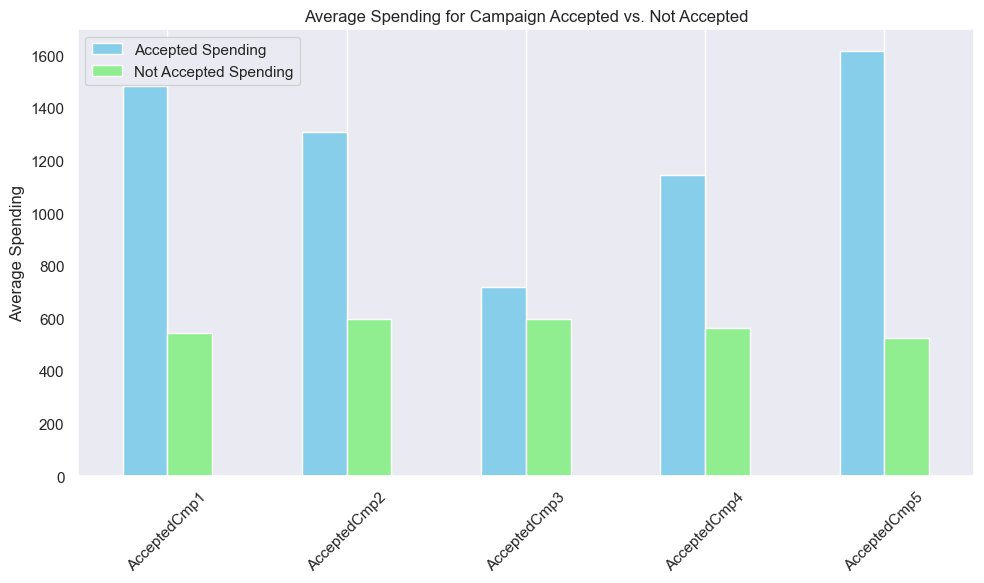

In [91]:
#  Visualize the Effect of Campaign Acceptance on Spending
plt.figure(figsize=(10, 6))
accepted_cmp_df.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen'])
plt.title('Average Spending for Campaign Accepted vs. Not Accepted')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

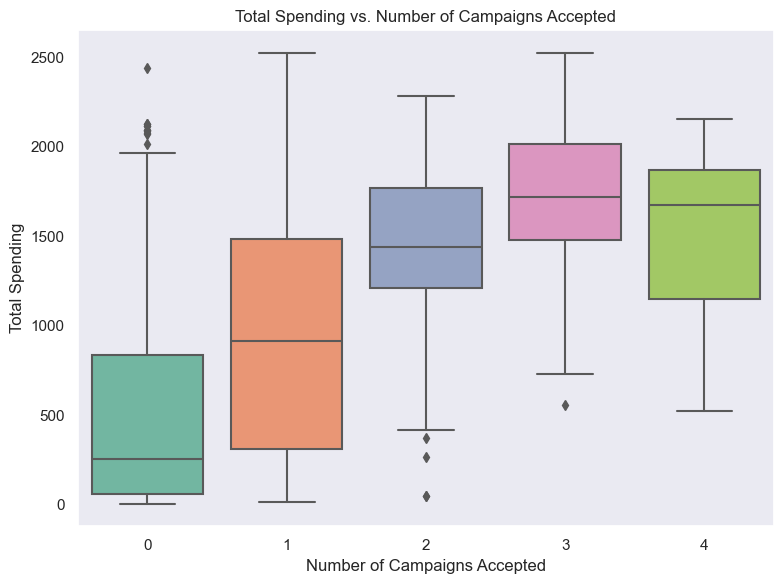

In [92]:
#  Compare Total Spending by Number of Campaigns Accepted
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_Accepted_Campaigns', y='Total_Spending', data=data, palette='Set2')
plt.title('Total Spending vs. Number of Campaigns Accepted')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Total Spending')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [95]:
# Perform Statistical Tests to Evaluate Significance
#  Perform t-test for one campaign (AcceptedCmp1) to check if there's a significant difference in spending
t_stat, p_value = stats.ttest_ind(
    data[data['AcceptedCmp1'] == 1]['Total_Spending'], 
    data[data['AcceptedCmp1'] == 0]['Total_Spending']
)

print(f"T-test for AcceptedCmp1: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

#  Perform ANOVA to assess the effect of total accepted campaigns on spending
anova_result = f_oneway(
    *[group['Total_Spending'].values for name, group in data.groupby('Total_Accepted_Campaigns')]
)

print(f"\nANOVA for Total Spending by Number of Campaigns Accepted: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

T-test for AcceptedCmp1: t-statistic = 19.52, p-value = 0.0000

ANOVA for Total Spending by Number of Campaigns Accepted: F-statistic = 154.80, p-value = 0.0000


In [96]:
# List of accepted campaign columns
accepted_campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Dictionary to store t-test results
t_test_results = {}

# Perform t-test for each campaign
for campaign in accepted_campaigns:
    t_stat, p_value = stats.ttest_ind(
        data[data[campaign] == 1]['Total_Spending'],
        data[data[campaign] == 0]['Total_Spending']
    )
    
    # Store results in the dictionary
    t_test_results[campaign] = {'t-statistic': t_stat, 'p-value': p_value}

# Print out the results in a readable format
print("T-test Results for Accepted Campaigns:")
for campaign, result in t_test_results.items():
    print(f"{campaign}: t-statistic = {result['t-statistic']:.2f}, p-value = {result['p-value']:.4f}")

# Perform ANOVA for the total accepted campaigns
anova_result = stats.f_oneway(
    *[group['Total_Spending'].values for name, group in data.groupby('Total_Accepted_Campaigns')]
)

# Print ANOVA result
print(f"\nANOVA for Total Spending by Number of Campaigns Accepted: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

T-test Results for Accepted Campaigns:
AcceptedCmp1: t-statistic = 19.52, p-value = 0.0000
AcceptedCmp2: t-statistic = 6.50, p-value = 0.0000
AcceptedCmp3: t-statistic = 2.54, p-value = 0.0110
AcceptedCmp4: t-statistic = 12.41, p-value = 0.0000
AcceptedCmp5: t-statistic = 25.06, p-value = 0.0000

ANOVA for Total Spending by Number of Campaigns Accepted: F-statistic = 154.80, p-value = 0.0000


In [98]:
# Loop through all campaigns and compare means
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for campaign in campaigns:
    accepted_mean = data[data[campaign] == 1]['Total_Spending'].mean()
    not_accepted_mean = data[data[campaign] == 0]['Total_Spending'].mean()
    
    print(f"{campaign}:")
    print(f"Mean Total Spending (Accepted): {accepted_mean:.2f}")
    print(f"Mean Total Spending (Not Accepted): {not_accepted_mean:.2f}")
    
    if accepted_mean > not_accepted_mean:
        print(f"The effect of {campaign} is positive (higher spending).\n")
    else:
        print(f"The effect of {campaign} is negative (lower spending).\n")


AcceptedCmp1:
Mean Total Spending (Accepted): 1484.08
Mean Total Spending (Not Accepted): 545.14
The effect of AcceptedCmp1 is positive (higher spending).

AcceptedCmp2:
Mean Total Spending (Accepted): 1307.67
Mean Total Spending (Not Accepted): 595.66
The effect of AcceptedCmp2 is positive (higher spending).

AcceptedCmp3:
Mean Total Spending (Accepted): 720.54
Mean Total Spending (Not Accepted): 596.15
The effect of AcceptedCmp3 is positive (higher spending).

AcceptedCmp4:
Mean Total Spending (Accepted): 1143.13
Mean Total Spending (Not Accepted): 561.78
The effect of AcceptedCmp4 is positive (higher spending).

AcceptedCmp5:
Mean Total Spending (Accepted): 1617.12
Mean Total Spending (Not Accepted): 526.67
The effect of AcceptedCmp5 is positive (higher spending).



## The impact of complaints on campaign

In [101]:
complaint_rate = data['Complain'].mean()*100 # percentage of customers with complaints
print(f"Complaint Rate:{complaint_rate:.2f}%")

Complaint Rate:0.89%


In [100]:
# Step 2: Compare Campaign Acceptance for Customers Who Complained vs. Those Who Didn't
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
accepted_cmp_means_complaints = {}
for campaign in campaign_columns:
    # mean acceptance rate for ncustomers with and without complaints 
    acceptance_complained = data[data['Complain']==1][campaign].mean()*100
    acceptance_not_complained = data[data['Complain']==0][campaign].mean()* 100
    accepted_cmp_means_complaints[campaign] = (acceptance_complained, acceptance_not_complained)
    
accepted_cmp_complaints_df = pd.DataFrame.from_dict(accepted_cmp_means_complaints, orient='index', columns=['Complained', 'Not Complained'])
print("\nCampaign Acceptance Rates for Customers Who Complained vs. Not Complained (%):")
print(accepted_cmp_complaints_df)


Campaign Acceptance Rates for Customers Who Complained vs. Not Complained (%):
              Complained  Not Complained
AcceptedCmp1         0.0        6.455982
AcceptedCmp2         0.0        1.354402
AcceptedCmp3        10.0        7.268623
AcceptedCmp4         0.0        7.539503
AcceptedCmp5         5.0        7.223476


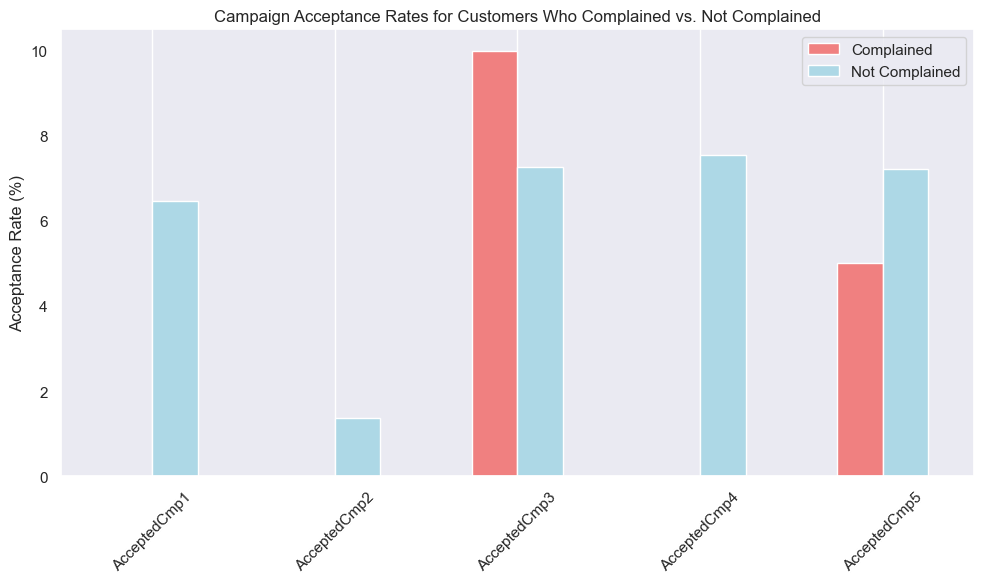

In [102]:
# Step 3: Visualize Campaign Acceptance Rates for Customers With and Without Complaints
plt.figure(figsize=(10, 6))
accepted_cmp_complaints_df.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('Campaign Acceptance Rates for Customers Who Complained vs. Not Complained')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [103]:
# Step 4: Analyze Spending Based on Complaints and Campaign Acceptance
accepted_spending_by_complaints = {}
for campaign in campaign_columns:
    spending_complained = data[(data['Complain'] == 1) & (data[campaign] == 1)]['Total_Spending'].mean()
    spending_not_complained = data[(data['Complain'] == 0) & (data[campaign] == 1)]['Total_Spending'].mean()
    accepted_spending_by_complaints[campaign] = (spending_complained, spending_not_complained)

accepted_spending_complaints_df = pd.DataFrame.from_dict(accepted_spending_by_complaints, orient='index', columns=['Complained', 'Not Complained'])

print("\nAverage Spending for Campaign Accepted by Complained vs. Not Complained:")
print(accepted_spending_complaints_df)


Average Spending for Campaign Accepted by Complained vs. Not Complained:
              Complained  Not Complained
AcceptedCmp1         NaN     1484.083916
AcceptedCmp2         NaN     1307.666667
AcceptedCmp3       919.0      718.074534
AcceptedCmp4         NaN     1143.125749
AcceptedCmp5      1365.0     1618.700000


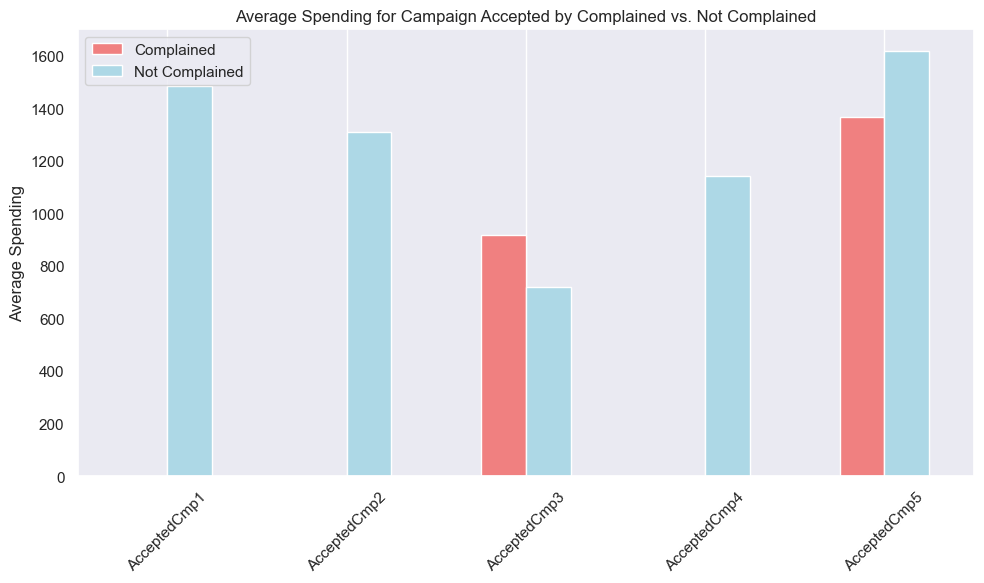

In [104]:
# Step 5: Visualize Spending for Customers Who Accepted Campaigns Based on Complaints
plt.figure(figsize=(10, 6))
accepted_spending_complaints_df.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('Average Spending for Campaign Accepted by Complained vs. Not Complained')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [105]:
# Step 6: Perform T-tests to Assess Statistical Significance
t_test_results = {}
for campaign in campaign_columns:
    # Spending comparison for customers who accepted the campaign based on complaint status
    t_stat, p_value = stats.ttest_ind(
        data[(data['Complain'] == 1) & (data[campaign] == 1)]['Total_Spending'],
        data[(data['Complain'] == 0) & (data[campaign] == 1)]['Total_Spending']
    )
    t_test_results[campaign] = (t_stat, p_value)

# Display T-test results
print("\nT-test Results for Spending (Complained vs. Not Complained) by Campaign:")
for campaign, result in t_test_results.items():
    print(f"{campaign}: t-statistic = {result[0]:.2f}, p-value = {result[1]:.4f}")



T-test Results for Spending (Complained vs. Not Complained) by Campaign:
AcceptedCmp1: t-statistic = nan, p-value = nan
AcceptedCmp2: t-statistic = nan, p-value = nan
AcceptedCmp3: t-statistic = 0.40, p-value = 0.6863
AcceptedCmp4: t-statistic = nan, p-value = nan
AcceptedCmp5: t-statistic = -0.60, p-value = 0.5482


In [106]:
# Step 7: Perform ANOVA for Number of Campaigns Accepted by Complaint Status
data['Total_Accepted_Campaigns'] = data[campaign_columns].sum(axis=1)
anova_result_complaints = f_oneway(
    data[data['Complain'] == 1]['Total_Accepted_Campaigns'], 
    data[data['Complain'] == 0]['Total_Accepted_Campaigns']
)

print(f"\nANOVA for Total Campaigns Accepted by Complaint Status: F-statistic = {anova_result_complaints.statistic:.2f}, p-value = {anova_result_complaints.pvalue:.4f}")


ANOVA for Total Campaigns Accepted by Complaint Status: F-statistic = 0.95, p-value = 0.3298


# Analyze recncey against campaign success

In [108]:
# Define recency segments
recency_bins = [0, 30, 60, 99]
recency_labels = ['Recent', 'Mid-Recency', 'Inactive']
data['Recency_Segment'] = pd.cut(data['Recency'], bins=recency_bins, labels=recency_labels, right=False)

# Step 1: Create a new column for total accepted campaigns
data['Total_Accepted_Campaigns'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Step 2: Compare Campaign Acceptance by Recency Segment
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Total_Accepted_Campaigns']
accepted_cmp_means_recency = {}
for campaign in campaign_columns:
    for segment in recency_labels:
        acceptance_rate = data[data['Recency_Segment'] == segment][campaign].mean() * 100  # Calculate acceptance rate for each segment
        if campaign not in accepted_cmp_means_recency:
            accepted_cmp_means_recency[campaign] = {}
        accepted_cmp_means_recency[campaign][segment] = acceptance_rate

# Create DataFrame for acceptance rates
accepted_cmp_recency_df = pd.DataFrame(accepted_cmp_means_recency)

# Display the results
print("\nCampaign Acceptance Rates by Recency Segment (%):")
print(accepted_cmp_recency_df)



Campaign Acceptance Rates by Recency Segment (%):
             AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Recent           6.801737      1.591896      8.104197      7.235890   
Mid-Recency      6.202723      0.605144      7.715582      6.505295   
Inactive         6.228374      1.730104      6.459054      8.419839   

             AcceptedCmp5  Total_Accepted_Campaigns  
Recent           7.670043                 31.403763  
Mid-Recency      5.900151                 26.928896  
Inactive         7.843137                 30.680507  


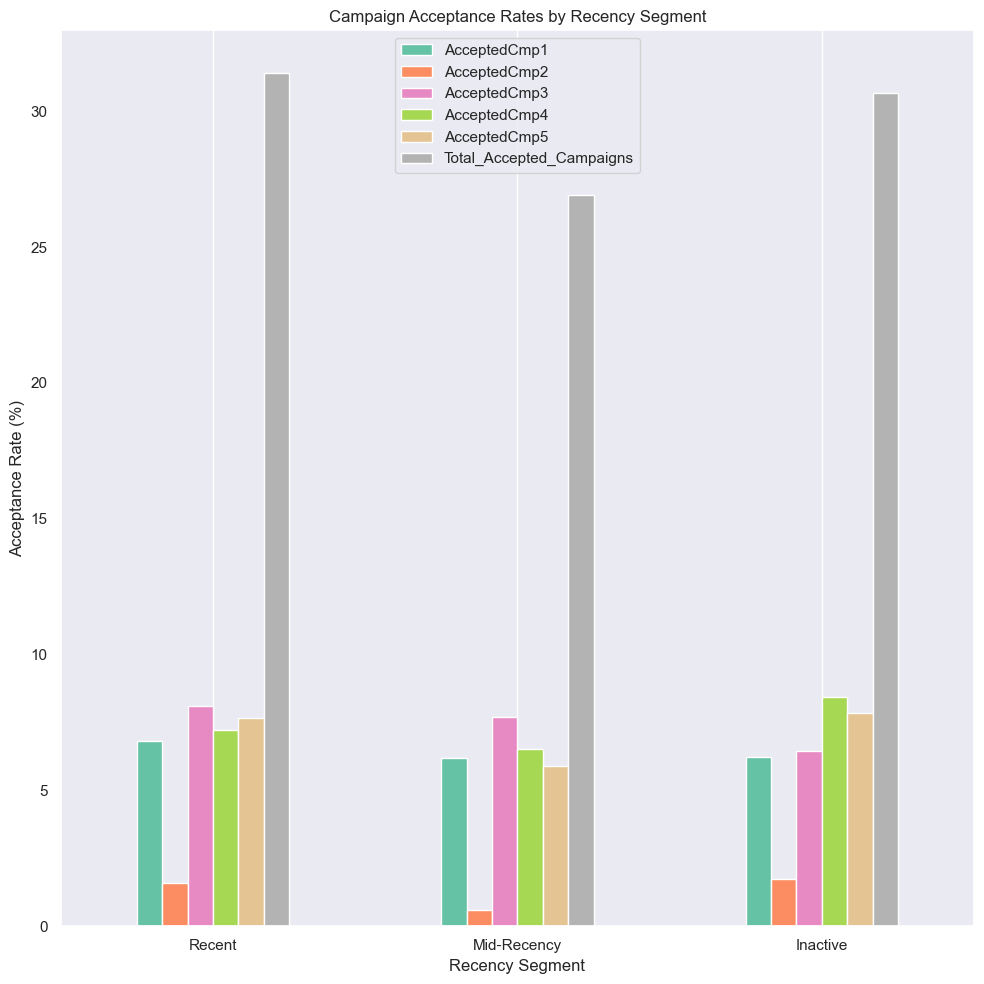

In [109]:
# Step 3: Visualize Campaign Acceptance Rates by Recency Segment
plt.figure(figsize=(10, 10))
accepted_cmp_recency_df.plot(kind='bar', ax=plt.gca(), colormap='Set2')
plt.title('Campaign Acceptance Rates by Recency Segment')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Recency Segment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [110]:
# Step 4: Analyze Spending After Campaign Acceptance by Recency Segment
accepted_spending_by_recency = {}
not_accepted_spending_by_recency = {}

for campaign in campaign_columns:
    for segment in recency_labels:
        # Calculate average spending for accepted campaigns
        accepted_spending = data[(data['Recency_Segment'] == segment) & (data[campaign] == 1)]['Total_Spending'].mean()
        if campaign not in accepted_spending_by_recency:
            accepted_spending_by_recency[campaign] = {}
        accepted_spending_by_recency[campaign][segment] = accepted_spending
        
        # Calculate average spending for not accepted campaigns
        not_accepted_spending = data[(data['Recency_Segment'] == segment) & (data[campaign] == 0)]['Total_Spending'].mean()
        if campaign not in not_accepted_spending_by_recency:
            not_accepted_spending_by_recency[campaign] = {}
        not_accepted_spending_by_recency[campaign][segment] = not_accepted_spending

# Create DataFrames for better visualization
accepted_spending_recency_df = pd.DataFrame(accepted_spending_by_recency)
not_accepted_spending_recency_df = pd.DataFrame(not_accepted_spending_by_recency)

# Combine both DataFrames for comparison
comparison_df = pd.concat([accepted_spending_recency_df.add_suffix('_Accepted'), 
                            not_accepted_spending_recency_df.add_suffix('_Not_Accepted')],
                           axis=1)

# Print the comparison DataFrame
print("\nAverage Spending for Campaign Accepted vs Not Accepted by Recency Segment:")
print(comparison_df)



Average Spending for Campaign Accepted vs Not Accepted by Recency Segment:
             AcceptedCmp1_Accepted  AcceptedCmp2_Accepted  \
Recent                 1400.936170            1140.727273   
Mid-Recency            1502.926829            1349.250000   
Inactive               1551.981481            1419.000000   

             AcceptedCmp3_Accepted  AcceptedCmp4_Accepted  \
Recent                  552.839286            1161.740000   
Mid-Recency             732.352941            1131.790698   
Inactive                877.482143            1137.945205   

             AcceptedCmp5_Accepted  Total_Accepted_Campaigns_Accepted  \
Recent                 1587.981132                         928.476190   
Mid-Recency            1631.692308                         867.563830   
Inactive               1639.411765                         948.766129   

             AcceptedCmp1_Not_Accepted  AcceptedCmp2_Not_Accepted  \
Recent                      537.740683                 587.648529   
Mid

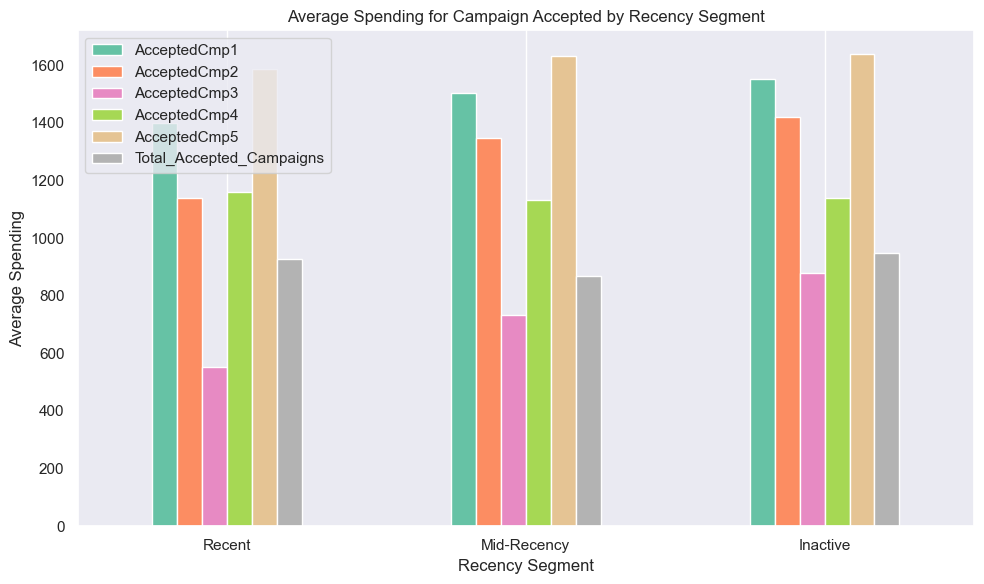

In [111]:
# Step 5: Visualize Spending for Customers Who Accepted Campaigns by Recency Segment
plt.figure(figsize=(10, 6))
accepted_spending_recency_df.plot(kind='bar', ax=plt.gca(), colormap='Set2')
plt.title('Average Spending for Campaign Accepted by Recency Segment')
plt.ylabel('Average Spending')
plt.xlabel('Recency Segment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [112]:
# Step 6: Perform ANOVA to Assess Impact of Recency on Campaign Success and Spending
anova_results_recency_campaigns = {}
anova_results_recency_spending = {}

# ANOVA for Campaign Acceptance Rates by Recency
for campaign in campaign_columns:
    groups = [data[data['Recency_Segment'] == segment][campaign] for segment in recency_labels]
    anova_results_recency_campaigns[campaign] = f_oneway(*groups)

# ANOVA for Spending After Campaign Acceptance by Recency Segment
for campaign in campaign_columns:
    groups = [data[(data['Recency_Segment'] == segment) & (data[campaign] == 1)]['Total_Spending'] for segment in recency_labels]
    anova_results_recency_spending[campaign] = f_oneway(*groups)


In [113]:
# Display ANOVA Results
print("\nANOVA Results for Campaign Acceptance by Recency Segment:")
for campaign, result in anova_results_recency_campaigns.items():
    print(f"{campaign}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

print("\nANOVA Results for Spending After Campaign Acceptance by Recency Segment:")
for campaign, result in anova_results_recency_spending.items():
    print(f"{campaign}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")


ANOVA Results for Campaign Acceptance by Recency Segment:
AcceptedCmp1: F-statistic = 0.14, p-value = 0.8731
AcceptedCmp2: F-statistic = 2.00, p-value = 0.1360
AcceptedCmp3: F-statistic = 0.86, p-value = 0.4238
AcceptedCmp4: F-statistic = 1.04, p-value = 0.3550
AcceptedCmp5: F-statistic = 1.22, p-value = 0.2965
Total_Accepted_Campaigns: F-statistic = 0.86, p-value = 0.4246

ANOVA Results for Spending After Campaign Acceptance by Recency Segment:
AcceptedCmp1: F-statistic = 1.14, p-value = 0.3240
AcceptedCmp2: F-statistic = 0.80, p-value = 0.4605
AcceptedCmp3: F-statistic = 3.13, p-value = 0.0462
AcceptedCmp4: F-statistic = 0.03, p-value = 0.9662
AcceptedCmp5: F-statistic = 0.24, p-value = 0.7862
Total_Accepted_Campaigns: F-statistic = 0.43, p-value = 0.6532


# Analyze the Relationship Between Income and Recency

In [114]:
#  Calculate Average Recency for Each Income Segment
mean_recency_by_income = data.groupby('Income_Group')['Recency'].mean()

print("Average Recency by Income Segment:")
print(mean_recency_by_income)

Average Recency by Income Segment:
Income_Group
Low Income       48.336525
Middle Income    49.567493
High Income      46.826923
Name: Recency, dtype: float64


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\1545413976.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_recency_by_income = data.groupby('Income_Group')['Recency'].mean()


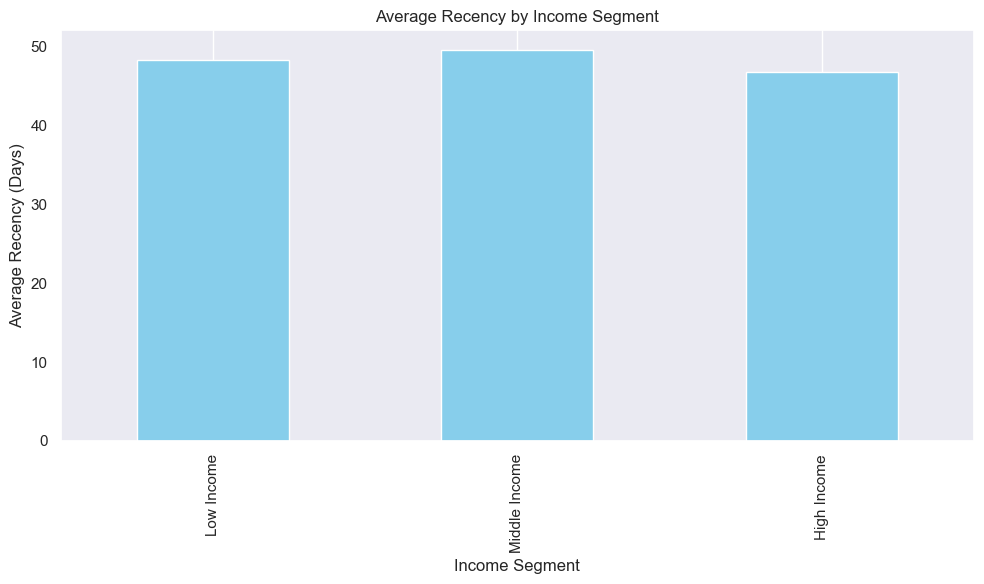

In [115]:
# Visualize Recency by Income Segment
plt.figure(figsize=(10, 6))

# Bar plot for average recency by income segment
mean_recency_by_income.plot(kind='bar', color='skyblue')
plt.title('Average Recency by Income Segment')
plt.xlabel('Income Segment')
plt.ylabel('Average Recency (Days)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


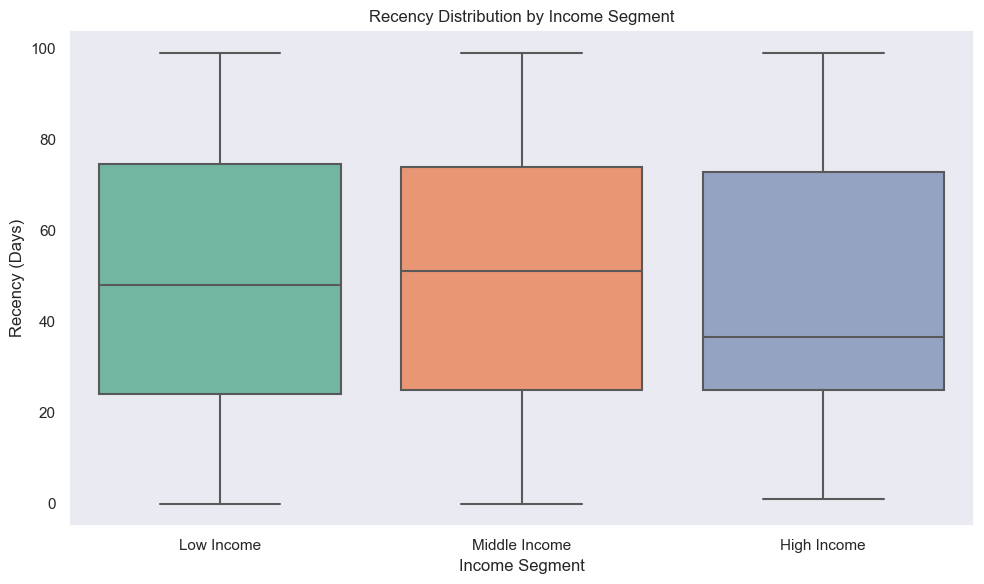

In [116]:
#  Visualize the Distribution of Recency by Income using Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Group', y='Recency', data=data, palette='Set2')
plt.title('Recency Distribution by Income Segment')
plt.xlabel('Income Segment')
plt.ylabel('Recency (Days)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [117]:
# Perform ANOVA to Determine if Differences in Recency Across Income Segments Are Significant
anova_result = f_oneway(
    data[data['Income_Group'] == 'Low Income']['Recency'],
    data[data['Income_Group'] == 'Medium Income']['Recency'],
    data[data['Income_Group'] == 'High Income']['Recency']
)

print(f"\nANOVA for Recency by Income Segment: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")


ANOVA for Recency by Income Segment: F-statistic = nan, p-value = nan


C:\Users\adjei\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


# Identify Key Spending Categories

In [119]:
spending_categories= ['Wines',
 'Fruits',
 'MeatProducts',
 'FishProducts',
 'SweetProducts',
 'GoldProds']

#calculate the total and avreage spending for each categories 
total_spending_by_category = data[spending_categories].sum()
mean_spending_by_category = data[spending_categories].mean()

print("Total Spending by Category:")
print(total_spending_by_category)

print("\nAverage Spending by Category:")
print(mean_spending_by_category)

Total Spending by Category:
Wines            679327
Fruits            58598
MeatProducts     372768
FishProducts      83528
SweetProducts     60492
GoldProds         97950
dtype: int64

Average Spending by Category:
Wines            303.949441
Fruits            26.218345
MeatProducts     166.786577
FishProducts      37.372707
SweetProducts     27.065772
GoldProds         43.825503
dtype: float64


In [120]:
#  Identify High-Value Customers (e.g., top 25% spenders in each category)
high_value_thresholds = data[spending_categories].quantile(0.75)  # 75th percentile as the threshold
high_value_customers = data[(data['Wines'] >= high_value_thresholds['Wines']) |
                             (data['Fruits'] >= high_value_thresholds['Fruits']) |
                             (data['MeatProducts'] >= high_value_thresholds['MeatProducts']) |
                             (data['FishProducts'] >= high_value_thresholds['FishProducts'])]

print(f"\nHigh-Value Customers Count: {len(high_value_customers)}")


High-Value Customers Count: 974


In [121]:
#Analyze Spending by Segments (e.g., by Income, Age, Family Structure)
mean_spending_by_income = high_value_customers.groupby('Income_Group')[spending_categories].mean()
mean_spending_by_age = high_value_customers.groupby('Age_Group')[spending_categories].mean()
mean_spending_by_family_structure = high_value_customers.groupby('Family_Structure')[spending_categories].mean()

print("\nMean Spending by Income Group for High-Value Customers:")
print(mean_spending_by_income)

print("\nMean Spending by Age Group for High-Value Customers:")
print(mean_spending_by_age)

print("\nMean Spending by Family Structure for High-Value Customers:")
print(mean_spending_by_family_structure)


Mean Spending by Income Group for High-Value Customers:
                    Wines     Fruits  MeatProducts  FishProducts  \
Income_Group                                                       
Low Income      81.468750  43.125000    139.312500     66.156250   
Middle Income  587.834637  53.518436    328.335196     75.259218   
High Income    787.063830  64.297872    678.425532     96.638298   

               SweetProducts  GoldProds  
Income_Group                             
Low Income         36.125000  58.843750  
Middle Income      53.177654  72.563128  
High Income        78.255319  62.851064  

Mean Spending by Age Group for High-Value Customers:
                                 Wines     Fruits  MeatProducts  FishProducts  \
Age_Group                                                                       
Young Adults (28-39)        560.268817  63.430108    450.064516     80.860215   
Middle-Aged Adults (40-54)  560.249284  56.896848    346.994269     80.673352   
Older Adults (

C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2670449355.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_income = high_value_customers.groupby('Income_Group')[spending_categories].mean()
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2670449355.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_age = high_value_customers.groupby('Age_Group')[spending_categories].mean()


C:\Users\adjei\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


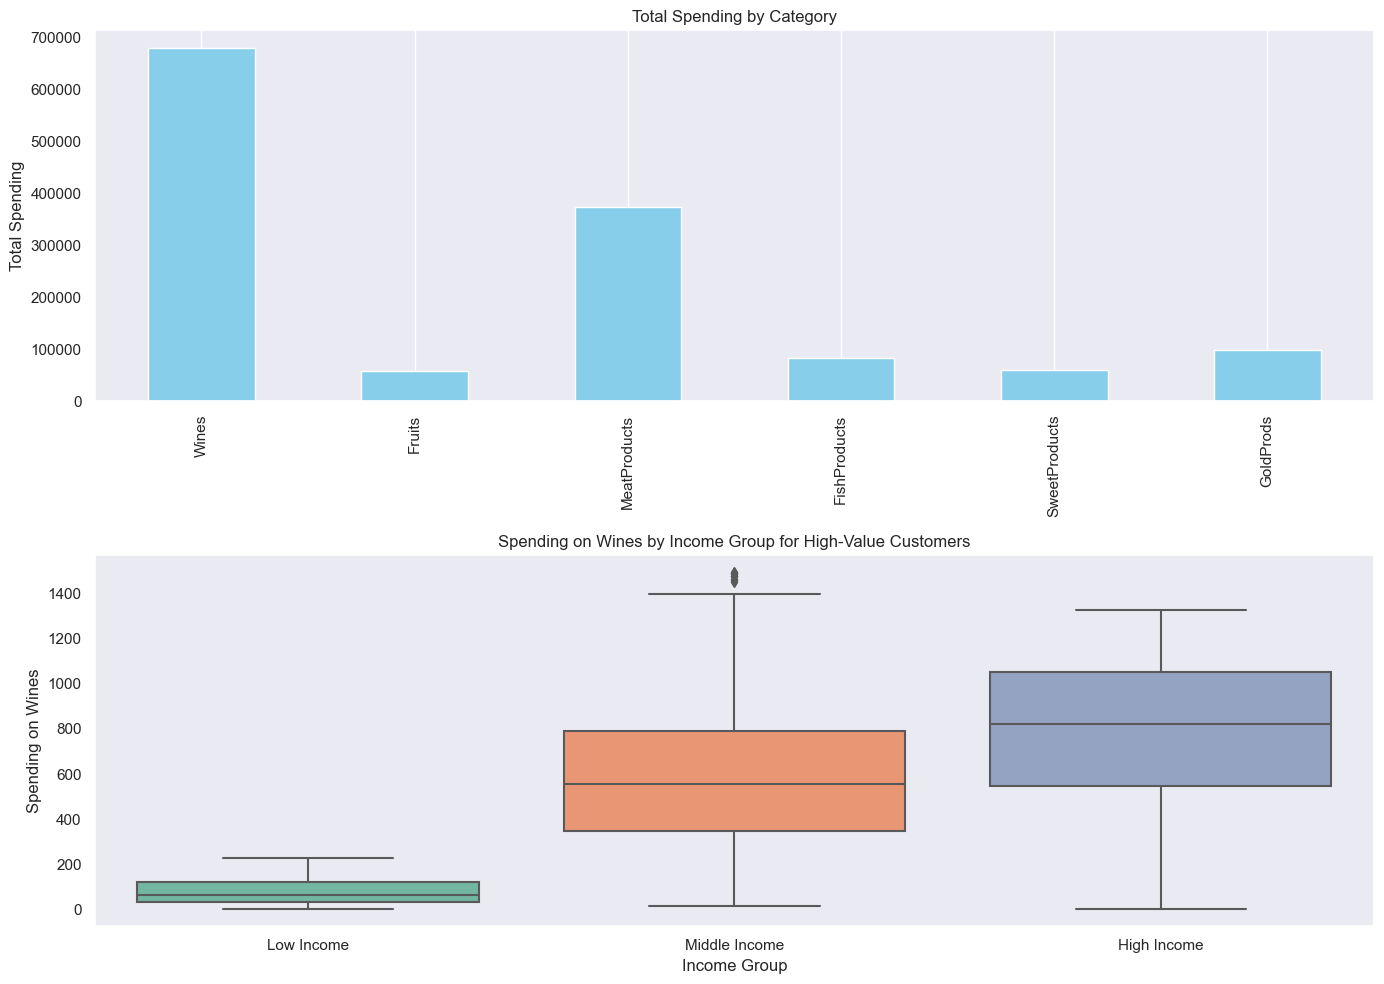

In [122]:
# Step 4: Visualize Spending Preferences in Key Categories
plt.figure(figsize=(14, 10))

# Bar plot for total spending by category
plt.subplot(2, 1, 1)
total_spending_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Category')
plt.ylabel('Total Spending')
plt.grid(axis='y')

# Box plot for spending by income group for high-value customers
plt.subplot(2, 1, 2)
sns.boxplot(x='Income_Group', y='Wines', data=high_value_customers, palette='Set2')
plt.title('Spending on Wines by Income Group for High-Value Customers')
plt.xlabel('Income Group')
plt.ylabel('Spending on Wines')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [123]:
# Step 5: Perform ANOVA to Identify Factors Influencing Spending on Key Categories
anova_results = {}
for category in spending_categories:
    # ANOVA by Income Group
    groups = [group[category].values for name, group in data.groupby('Income_Group')]
    anova_results[category + '_Income'] = f_oneway(*groups)

    # ANOVA by Age Group
    groups = [group[category].values for name, group in data.groupby('Age_Group')]
    anova_results[category + '_Age'] = f_oneway(*groups)


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3551518334.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[category].values for name, group in data.groupby('Income_Group')]
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\3551518334.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[category].values for name, group in data.groupby('Age_Group')]


In [124]:
# Display ANOVA results
print("\nANOVA Results for Spending by Income and Age Groups:")
for key, result in anova_results.items():
    print(f"{key}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")


ANOVA Results for Spending by Income and Age Groups:
Wines_Income: F-statistic = 570.76, p-value = 0.0000
Wines_Age: F-statistic = 20.16, p-value = 0.0000
Fruits_Income: F-statistic = 173.78, p-value = 0.0000
Fruits_Age: F-statistic = 2.06, p-value = 0.1041
MeatProducts_Income: F-statistic = 389.31, p-value = 0.0000
MeatProducts_Age: F-statistic = 6.36, p-value = 0.0003
FishProducts_Income: F-statistic = 184.75, p-value = 0.0000
FishProducts_Age: F-statistic = 2.91, p-value = 0.0331
SweetProducts_Income: F-statistic = 193.09, p-value = 0.0000
SweetProducts_Age: F-statistic = 2.24, p-value = 0.0822
GoldProds_Income: F-statistic = 159.26, p-value = 0.0000
GoldProds_Age: F-statistic = 5.37, p-value = 0.0011


In [125]:
#2: Calculate Total and Average Spending by Income Group
total_spending_by_income = data.groupby('Income_Group')['Total_Spending'].sum()
mean_spending_by_income = data.groupby('Income_Group')['Total_Spending'].mean()

print("Total Spending by Income Group:")
print(total_spending_by_income)

print("\nAverage Spending by Income Group:")
print(mean_spending_by_income)

Total Spending by Income Group:
Income_Group
Low Income         68633
Middle Income    1200499
High Income        83531
Name: Total_Spending, dtype: int64

Average Spending by Income Group:
Income_Group
Low Income         93.889193
Middle Income     826.789945
High Income      1606.365385
Name: Total_Spending, dtype: float64


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\1452131648.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending_by_income = data.groupby('Income_Group')['Total_Spending'].sum()
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\1452131648.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_income = data.groupby('Income_Group')['Total_Spending'].mean()


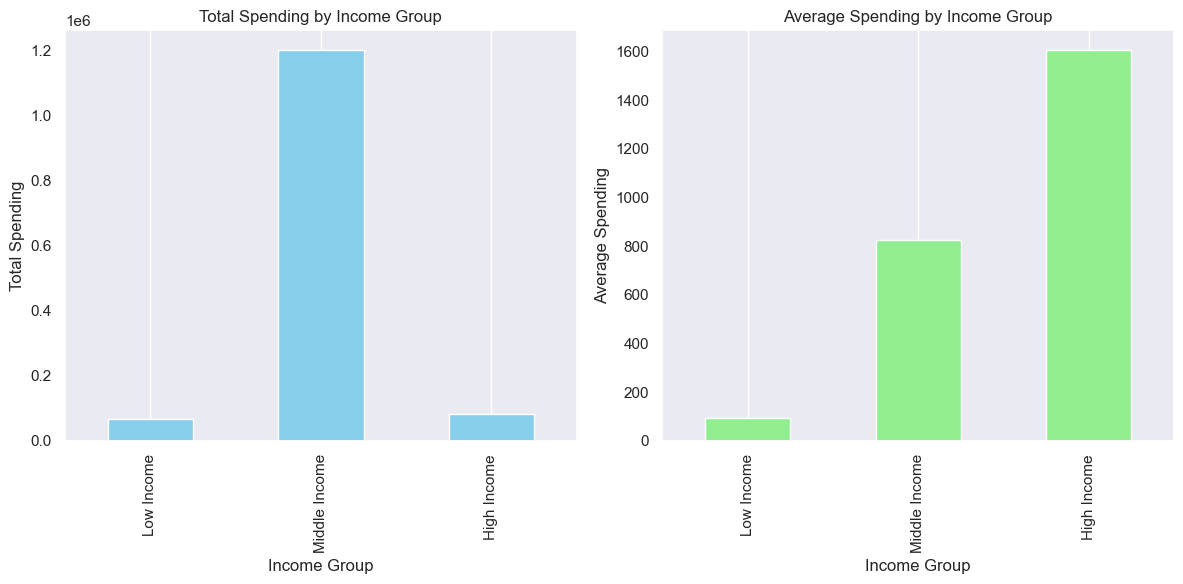

In [126]:
# Step 3: Visualize Total and Average Spending by Income Group
plt.figure(figsize=(12, 6))

# Bar plot for total spending by income group
plt.subplot(1, 2, 1)
total_spending_by_income.plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Total Spending by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total Spending')
plt.grid(axis='y')

# Bar plot for average spending by income group
plt.subplot(1, 2, 2)
mean_spending_by_income.plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Average Spending by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Spending')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


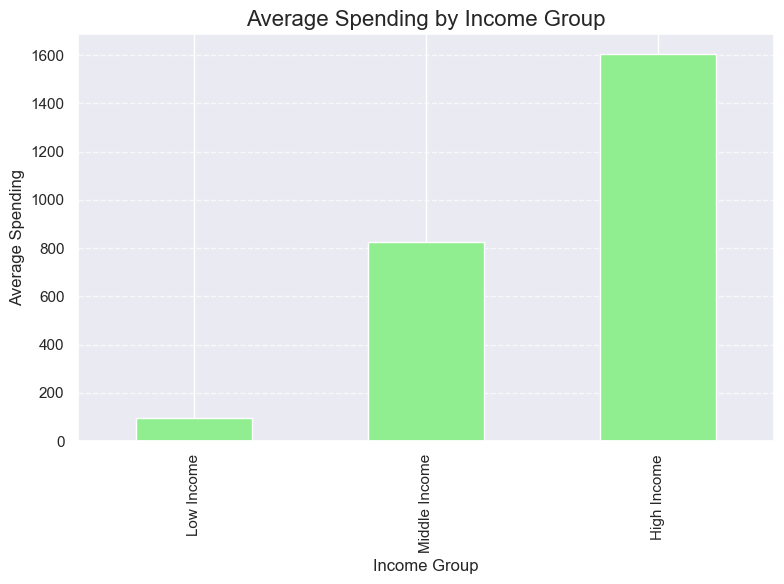

In [127]:
sorted_mean_spending = mean_spending_by_income.sort_values(ascending=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
sorted_mean_spending.plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Average Spending by Income Group',fontsize=16)
plt.xlabel('Income Group')
plt.ylabel('Average Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Improved grid visibility

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()


# Assess the impact of purchase channels

In [128]:
# Step 1: Summarize Purchases by Channel (Web, Catalog, Store)
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calculate total and average purchases for each channel
total_purchases_by_channel = data[channel_columns].sum()
mean_purchases_by_channel = data[channel_columns].mean()

print("Total Purchases by Channel:")
print(total_purchases_by_channel)

print("\nAverage Purchases by Channel:")
print(mean_purchases_by_channel)

Total Purchases by Channel:
NumWebPurchases         9136
NumCatalogPurchases     5941
NumStorePurchases      12949
dtype: int64

Average Purchases by Channel:
NumWebPurchases        4.087696
NumCatalogPurchases    2.658166
NumStorePurchases      5.793736
dtype: float64


In [129]:
# Step 2: Analyze Purchases by Customer Segments (e.g., by Income, Age, Family Structure)
mean_purchases_by_income = data.groupby('Income_Group')[channel_columns].mean()
mean_purchases_by_age = data.groupby('Age_Group')[channel_columns].mean()
mean_purchases_by_family_structure = data.groupby('Family_Structure')[channel_columns].mean()


print("\nMean Purchases by Income Group:")
print(mean_purchases_by_income)

print("\nMean Purchases by Age Group:")
print(mean_purchases_by_age)

print("\nMean Purchases by Family Structure:")
print(mean_purchases_by_family_structure)




Mean Purchases by Income Group:
               NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Income_Group                                                          
Low Income            2.146375             0.523940           3.073871
Middle Income         5.027548             3.579201           7.108815
High Income           5.134615             6.942308           7.307692

Mean Purchases by Age Group:
                            NumWebPurchases  NumCatalogPurchases  \
Age_Group                                                          
Young Adults (28-39)               3.350000             2.486364   
Middle-Aged Adults (40-54)         3.784730             2.279958   
Older Adults (55-69)               4.440476             2.870370   
Seniors (70-84)                    4.661392             3.398734   

                            NumStorePurchases  
Age_Group                                      
Young Adults (28-39)                 5.509091  
Middle-Aged Adults (40-54)   

C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2856542057.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_purchases_by_income = data.groupby('Income_Group')[channel_columns].mean()
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2856542057.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_purchases_by_age = data.groupby('Age_Group')[channel_columns].mean()


In [130]:
channel_columns


['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

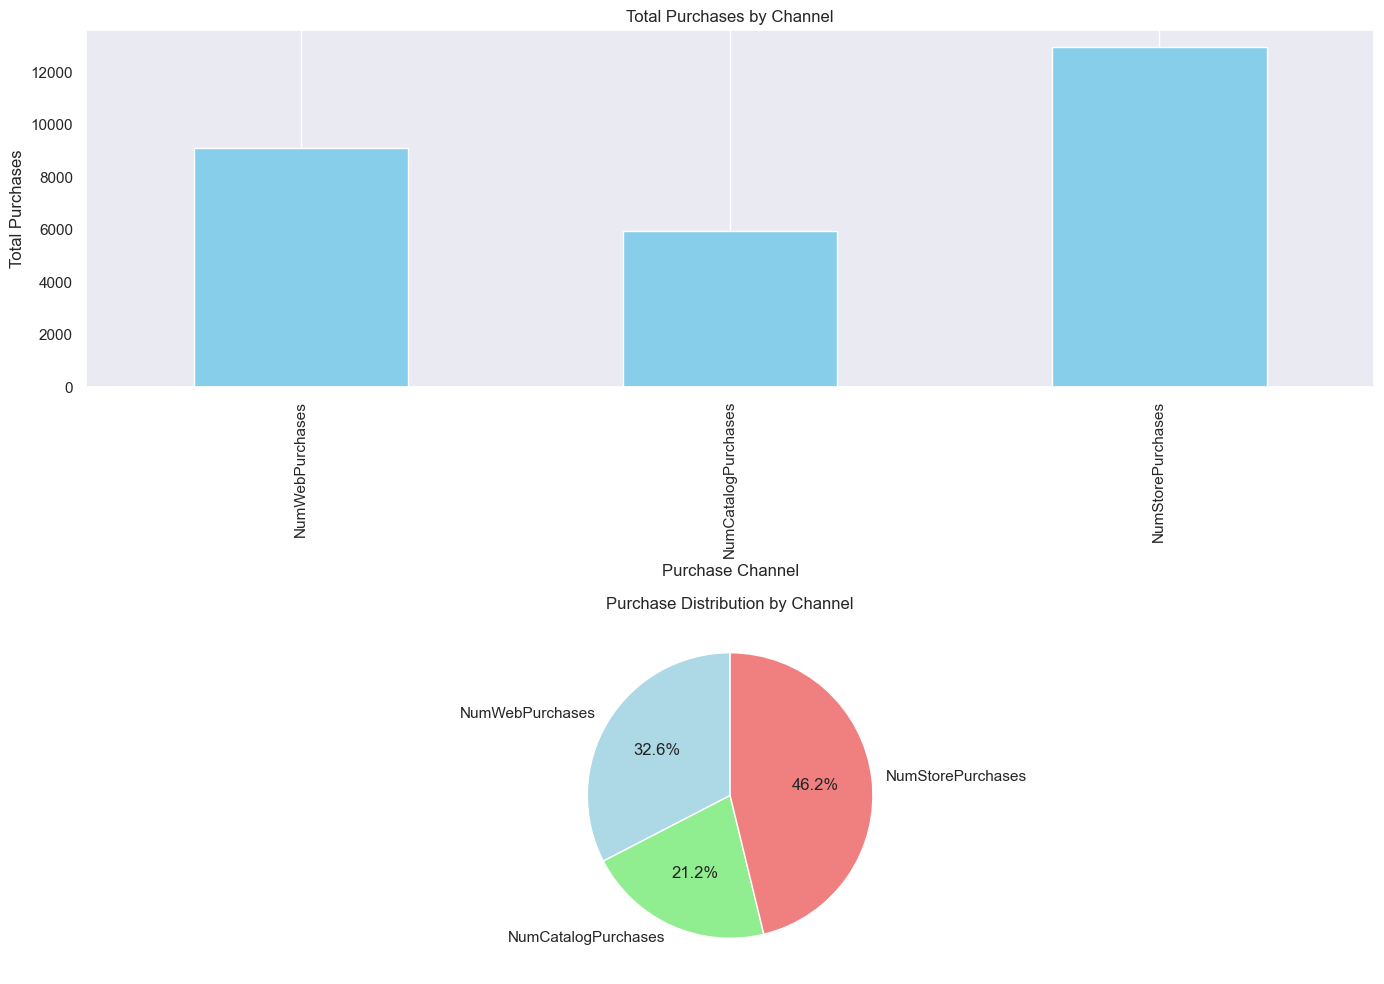

In [131]:
# Step 3: Visualize Channel Preferences with Bar Charts and Pie Charts
plt.figure(figsize=(14, 10))

# Bar plot for total purchases by channel
plt.subplot(2, 1, 1)
total_purchases_by_channel.plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Total Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Total Purchases')
plt.grid(axis='y')

# Pie chart for distribution of total purchases by channel
plt.subplot(2, 1, 2)
plt.pie(total_purchases_by_channel, labels=channel_columns, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.title('Purchase Distribution by Channel')

plt.tight_layout()
plt.show()

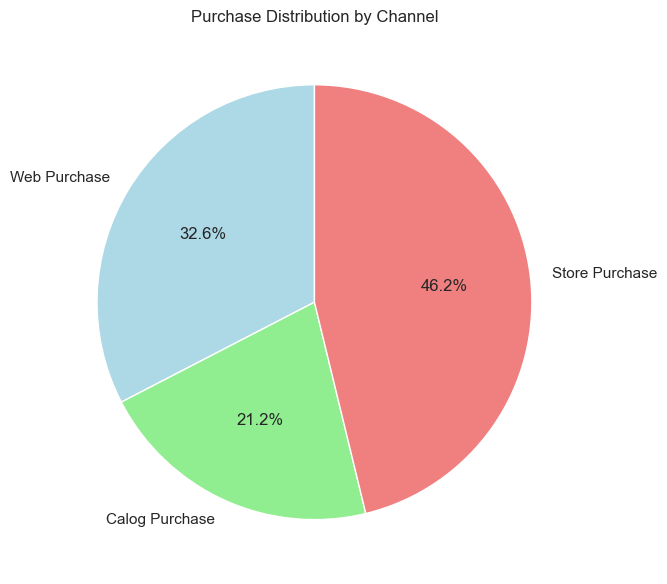

In [132]:
channel_columnss = ['Web Purchase', 'Calog Purchase', 'Store Purchase']
plt.figure(figsize=(8, 6))
plt.pie(total_purchases_by_channel, labels=channel_columnss, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.title('Purchase Distribution by Channel')

plt.tight_layout()
plt.show()

In [133]:
# Step 4: Perform ANOVA to Identify Differences in Purchases Across Demographics
anova_results = {}
for channel in channel_columns:
    # ANOVA by Income Group
    groups_income = [group[channel].values for name, group in data.groupby('Income_Group')]
    anova_results[channel + '_Income'] = f_oneway(*groups_income)

    # ANOVA by Age Group
    groups_age = [group[channel].values for name, group in data.groupby('Age_Group')]
    anova_results[channel + '_Age'] = f_oneway(*groups_age)

# Display ANOVA results
print("\nANOVA Results for Purchases by Income and Age Groups:")
for key, result in anova_results.items():
    print(f"{key}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")


ANOVA Results for Purchases by Income and Age Groups:
NumWebPurchases_Income: F-statistic = 346.74, p-value = 0.0000
NumWebPurchases_Age: F-statistic = 17.83, p-value = 0.0000
NumCatalogPurchases_Income: F-statistic = 454.79, p-value = 0.0000
NumCatalogPurchases_Age: F-statistic = 13.87, p-value = 0.0000
NumStorePurchases_Income: F-statistic = 575.33, p-value = 0.0000
NumStorePurchases_Age: F-statistic = 14.87, p-value = 0.0000


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2978384302.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_income = [group[channel].values for name, group in data.groupby('Income_Group')]
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2978384302.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_age = [group[channel].values for name, group in data.groupby('Age_Group')]


# investigate the correlation between complaints and spending 

In [134]:
# segemnet customers by complaint status 
complain_status = data.groupby('Complain')['Total_Spending'].agg(['mean','sum','count'])
print("\nSpending Behavior by Complaint Status:")
print(complain_status)


Spending Behavior by Complaint Status:
                mean      sum  count
Complain                            
0         607.143567  1344823   2215
1         392.000000     7840     20


In [140]:
# Extract mean spending for easier access
mean_spending = complain_status['mean']
mean_spending

Complain
0    607.143567
1    392.000000
Name: mean, dtype: float64

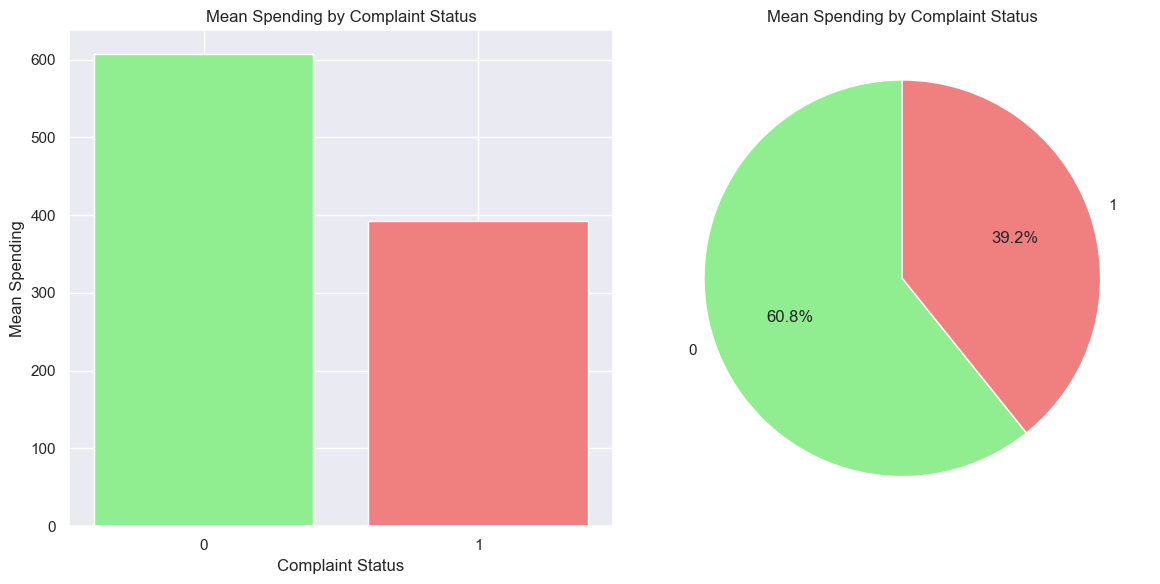

In [142]:
# Prepare labels for the pie chart
labels = complain_status.index.astype(str)  # Ensure labels are string type

# Setup the figure and axes for a side-by-side plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
axs[0].bar(labels, mean_spending, color=['lightgreen', 'lightcoral'])
axs[0].set_title('Mean Spending by Complaint Status')
axs[0].set_ylabel('Mean Spending')
axs[0].set_xlabel('Complaint Status')

# Pie chart
axs[1].pie(mean_spending, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
axs[1].set_title('Mean Spending by Complaint Status')

plt.tight_layout()
plt.show()

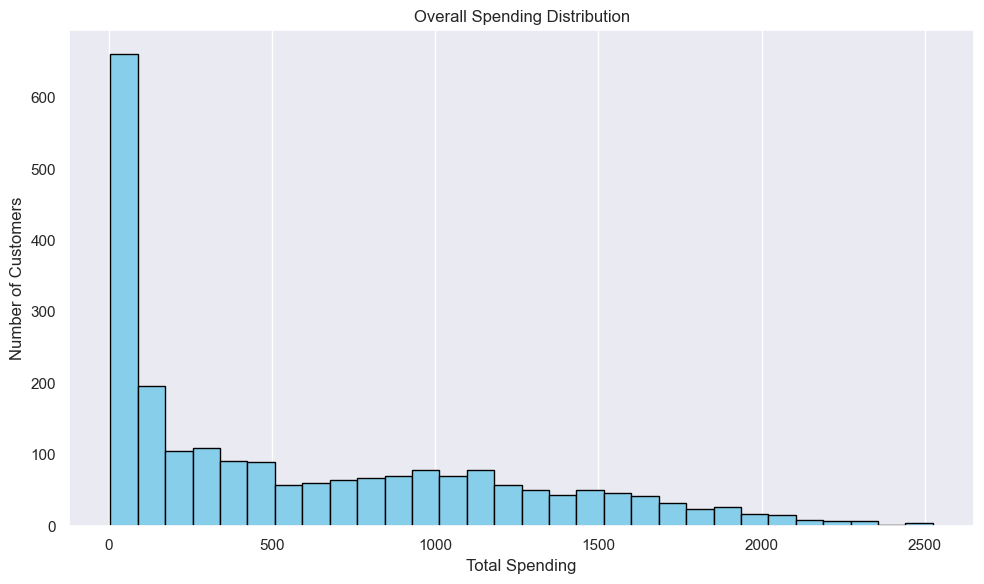

In [143]:
# Step 1: Explore the Overall Spending Distribution
plt.figure(figsize=(10, 6))

# Histogram for total spending distribution
plt.hist(data['Total_Spending'], bins=30, color='skyblue', edgecolor='black')
plt.title('Overall Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

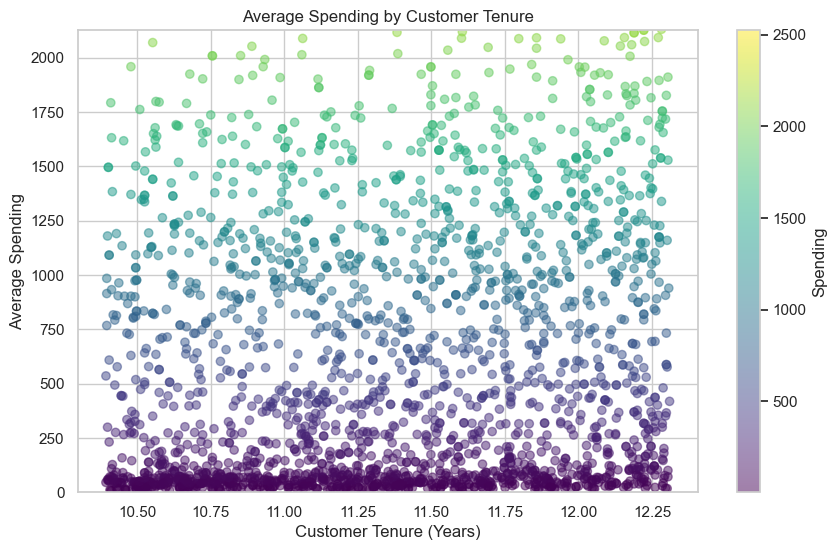

In [144]:
# Setting the style
sns.set(style="whitegrid")

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Tenure_Years'], data['Total_Spending'], alpha=0.5, c=data['Total_Spending'], cmap='viridis')
plt.colorbar(label='Spending')
plt.title('Average Spending by Customer Tenure')
plt.xlabel('Customer Tenure (Years)')
plt.ylabel('Average Spending')
plt.ylim(0, data['Total_Spending'].quantile(0.99))  # Limiting to 99th percentile for better visualization

plt.show()

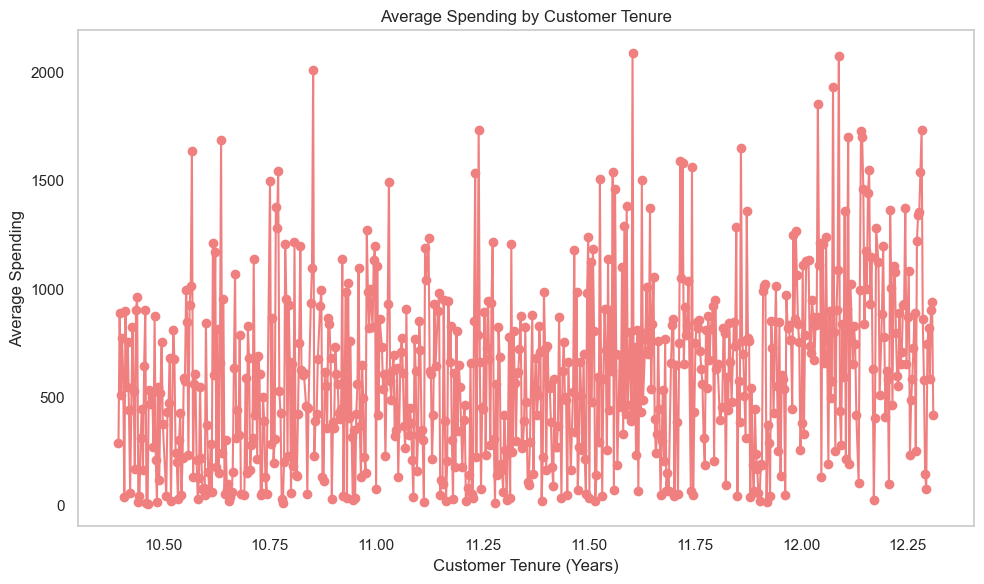

In [145]:
# Step 2: Analyze Spending Trends Over Time (Using Customer Tenure as a Proxy for Time)
plt.figure(figsize=(10, 6))

# Line plot for average spending by tenure in years
mean_spending_by_tenure = data.groupby('Tenure_Years')['Total_Spending'].mean()
mean_spending_by_tenure.plot(kind='line', color='lightcoral', marker='o')
plt.title('Average Spending by Customer Tenure')
plt.xlabel('Customer Tenure (Years)')
plt.ylabel('Average Spending')
plt.grid()

plt.tight_layout()
plt.show()

In [146]:
# Step 3: Analyze Spending by Segments (e.g., Income Group, Age Group, Family Structure)
mean_spending_by_income = data.groupby('Income_Group')['Total_Spending'].mean()
mean_spending_by_age = data.groupby('Age_Group')['Total_Spending'].mean()
mean_spending_by_family_structure = data.groupby('Family_Structure')['Total_Spending'].mean()

print("\nMean Spending by Income Group:")
print(mean_spending_by_income)

print("\nMean Spending by Age Group:")
print(mean_spending_by_age)

print("\nMean Spending by Family Structure:")
print(mean_spending_by_family_structure)


Mean Spending by Income Group:
Income_Group
Low Income         93.889193
Middle Income     826.789945
High Income      1606.365385
Name: Total_Spending, dtype: float64

Mean Spending by Age Group:
Age_Group
Young Adults (28-39)          606.390909
Middle-Aged Adults (40-54)    525.148462
Older Adults (55-69)          644.517196
Seniors (70-84)               749.325949
Name: Total_Spending, dtype: float64

Mean Spending by Family Structure:
Family_Structure
No Kids or Teen    1104.581102
Teen Only           702.845566
With kids           202.529598
Name: Total_Spending, dtype: float64


C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2910826682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_income = data.groupby('Income_Group')['Total_Spending'].mean()
C:\Users\adjei\AppData\Local\Temp\ipykernel_16868\2910826682.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending_by_age = data.groupby('Age_Group')['Total_Spending'].mean()


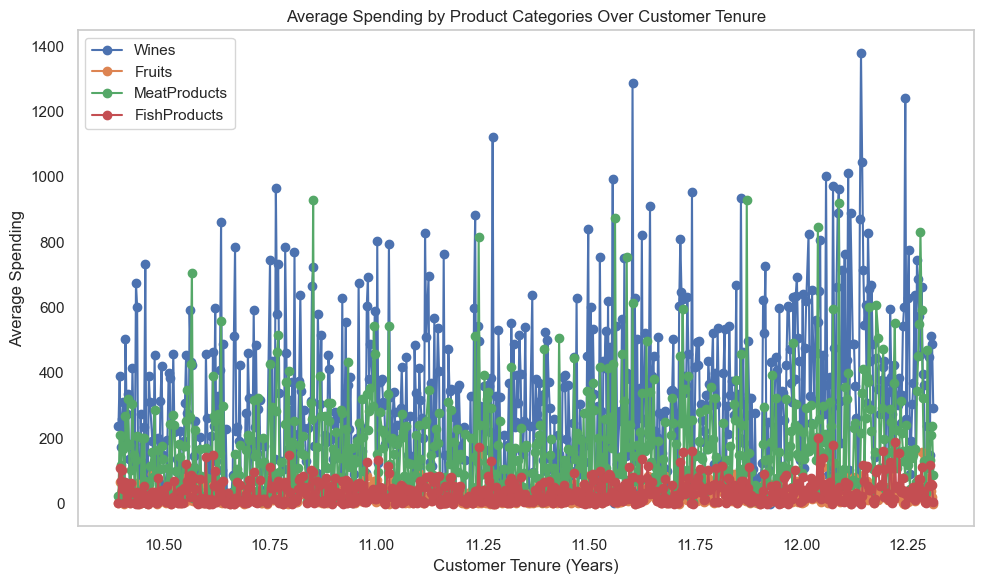

In [147]:
# Step 4: Visualize Spending by Product Categories Over Time
plt.figure(figsize=(10, 6))

# Create time-related features if available, or use customer tenure as a proxy
mean_spending_by_category_and_tenure = data.groupby('Tenure_Years')[['Wines', 'Fruits', 'MeatProducts', 'FishProducts']].mean()

# Line plot for average spending on categories by tenure
mean_spending_by_category_and_tenure.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Average Spending by Product Categories Over Customer Tenure')
plt.xlabel('Customer Tenure (Years)')
plt.ylabel('Average Spending')
plt.grid()

plt.tight_layout()
plt.show()

In [148]:
# Step 5: Identify High-Value Customers (e.g., Top 25% Spenders)
high_value_threshold = data['Total_Spending'].quantile(0.75)  # Top 25% of spenders
high_value_customers = data[data['Total_Spending'] >= high_value_threshold]


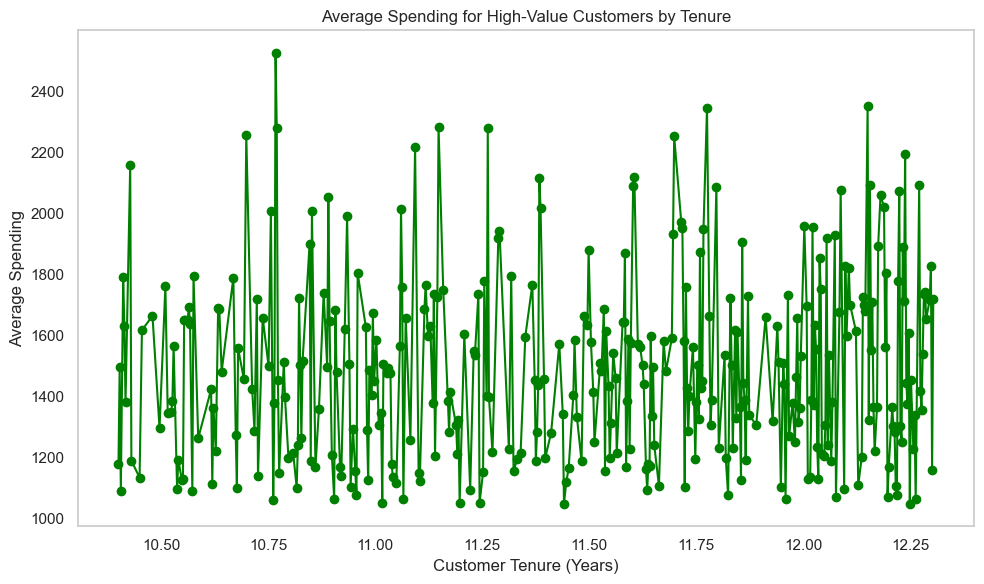

In [149]:
# Analyze spending trends for high-value customers by tenure or segment
mean_spending_high_value_by_tenure = high_value_customers.groupby('Tenure_Years')['Total_Spending'].mean()

plt.figure(figsize=(10, 6))
mean_spending_high_value_by_tenure.plot(kind='line', color='green', marker='o')
plt.title('Average Spending for High-Value Customers by Tenure')
plt.xlabel('Customer Tenure (Years)')
plt.ylabel('Average Spending')
plt.grid()

plt.tight_layout()
plt.show()


# Factor analysis

In [153]:
# Step 1: Select the variables to perform factor analysis (e.g., spending categories)
spending_categories = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds']

# Step 2: Standardize the Data (Factor Analysis is sensitive to different scales)
scaler = StandardScaler()
spending_data_scaled = scaler.fit_transform(data[spending_categories])




In [154]:
# Step 3: Perform Factor Analysis
# Choose the number of factors (e.g., 2 factors for simplicity)
factor_model = FactorAnalysis(n_components=2, random_state=0)
factors = factor_model.fit_transform(spending_data_scaled)


In [155]:
# Step 4: Analyze the Loadings (how much each spending category contributes to each factor)
loadings = pd.DataFrame(factor_model.components_.T, index=spending_categories, columns=['Factor 1', 'Factor 2'])

print("\nFactor Loadings (Contribution of Each Spending Category to the Factors):")
print(loadings)



Factor Loadings (Contribution of Each Spending Category to the Factors):
               Factor 1  Factor 2
Wines          0.846617 -0.379056
Fruits         0.641966  0.406413
MeatProducts   0.734951  0.162696
FishProducts   0.667000  0.428819
SweetProducts  0.629167  0.387664
GoldProds      0.509953  0.130003


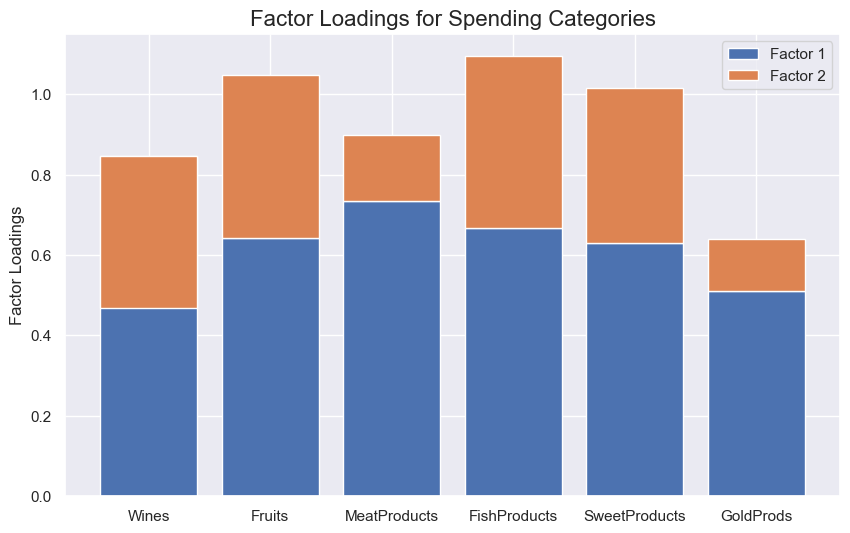

In [156]:
plt.figure(figsize=(10, 6))
plt.bar(loadings.index, loadings['Factor 1'], label='Factor 1')
plt.bar(loadings.index, loadings['Factor 2'], bottom=loadings['Factor 1'], label='Factor 2')
plt.ylabel('Factor Loadings')
plt.title('Factor Loadings for Spending Categories',fontsize=16)
plt.legend()
plt.show()

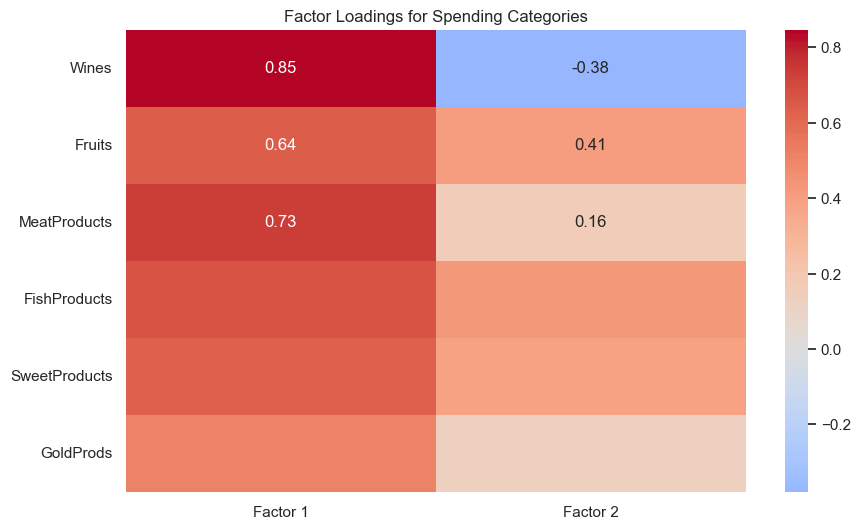

In [157]:
# Step 5: Visualize the Loadings to Understand Which Categories Influence the Factors
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings for Spending Categories')
plt.show()


In [158]:
# Step 6: Interpret the Factors
# You can print the factor values for each customer to see how they score on the factors
data['Factor_1'] = factors[:, 0]
data['Factor_2'] = factors[:, 1]

# Step 7: Correlate the Factors with Total Spending (Optional)
correlations = data[['Factor_1', 'Factor_2', 'Total_Spending']].corr()

print("\nCorrelation of Factors with Total Spending:")
print(correlations)



Correlation of Factors with Total Spending:
                    Factor_1      Factor_2  Total_Spending
Factor_1        1.000000e+00 -3.631520e-13        0.985823
Factor_2       -3.631520e-13  1.000000e+00       -0.057001
Total_Spending  9.858234e-01 -5.700100e-02        1.000000


# Time series analysis

In [162]:
# Convert the 'Dt_Customer' column to datetime format to work with time series data
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Aggregate total spending by the date of customer registration (Dt_Customer)
# Summing the total spending across customers for each registration date
time_series_data = data.groupby('Dt_Customer')['Total_Spending'].sum().reset_index()

# Set 'Dt_Customer' as the index for the time series data
time_series_data.set_index('Dt_Customer', inplace=True)

# Display the prepared time series data
time_series_data.head()


Total_Spending
Dt_Customer                
2012-07-30              418
2012-07-31              939
2012-08-01             3609
2012-08-02             1752
2012-08-03             4097

In [163]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_test_result = adfuller(time_series_data['Total_Spending'])

# Extract the results
adf_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

# Display the results of the ADF test
{
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Critical Values": critical_values
}

{'ADF Statistic': -7.0636306669413464,
 'p-value': 5.147201863437072e-10,
 'Critical Values': {'1%': -3.4403730727154724,
  '5%': -2.86596268312982,
  '10%': -2.569125249694074}}

In [164]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (start with ARIMA(1, 0, 1) since the data is already stationary)
arima_model = ARIMA(time_series_data['Total_Spending'], order=(1, 0, 1))
arima_result = arima_model.fit()

# Display the model summary
arima_result.summary()


C:\Users\adjei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adjei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adjei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Total_Spending   No. Observations:                  663
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5873.535
Date:                Sun, 17 Nov 2024   AIC                          11755.071
Time:                        19:11:25   BIC                          11773.058
Sample:                             0   HQIC                         11762.041
                                - 663                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2040.9955    380.139      5.369      0.000    1295.936    2786.055
ar.L1          0.9969      0.005    202.614      0.000       0.987       1.007
ma.L1         -0.9801      0.012    -79.488      0.000      -1.004      -0.956
sigma2      2.897e+06      0.480   6.04e+06      0.000     2.9e+06     2.9e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):               261.33
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.04e+21. Standard errors may be unstable.
"""

In [165]:
# Forecast the next 12 periods (e.g., 12 months or 1 year, depending on the time unit of the data)
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame to display the forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'Forecasted Spending': forecast_values,
    'Lower CI': confidence_intervals.iloc[:, 0],
    'Upper CI': confidence_intervals.iloc[:, 1]
})

# Display the forecast results
forecast_df


C:\Users\adjei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\adjei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Spending     Lower CI     Upper CI
663          1627.622250 -1708.381949  4963.626450
664          1628.919629 -1707.551732  4965.390989
665          1630.212935 -1706.722593  4967.148464
666          1631.502183 -1705.894541  4968.898907
667          1632.787384 -1705.067582  4970.642350
668          1634.068552 -1704.241722  4972.378826
669          1635.345698 -1703.416969  4974.108365
670          1636.618836 -1702.593327  4975.831000
671          1637.887979 -1701.770805  4977.546762
672          1639.153138 -1700.949407  4979.255683
673          1640.414327 -1700.129140  4980.957794
674          1641.671557 -1699.310011  4982.653125

NameError: name 'forecast_index' is not defined

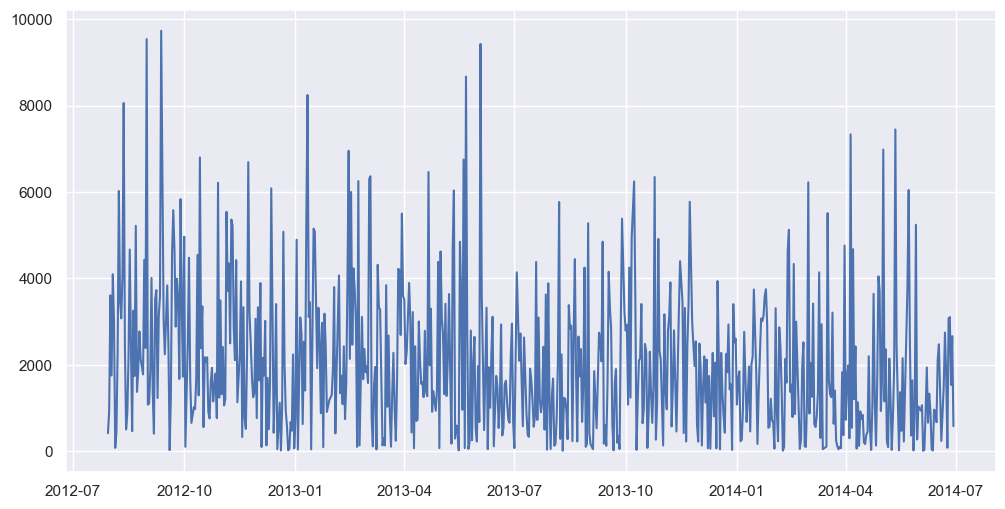

In [167]:
##Remove any invalid values (NaNs or non-numeric types) from the confidence intervals
confidence_intervals_cleaned = confidence_intervals.apply(pd.to_numeric, errors='coerce').dropna()

# Visualize the ARIMA forecast trends along with cleaned confidence intervals
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(time_series_data.index, time_series_data['Total_Spending'], label='Historical Spending')

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label='Forecasted Spending', color='orange')

# Plot confidence intervals
plt.fill_between(forecast_index[:len(confidence_intervals_cleaned)], 
                 confidence_intervals_cleaned['lower'], 
                 confidence_intervals_cleaned['upper'], 
                 color='orange', alpha=0.3, label='Confidence Interval')

plt.title('ARIMA Forecast of Consumer Spending')
plt.xlabel('Time')
plt.ylabel('Total Spending')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [169]:
start_date = pd.to_datetime("2014-06-30")  # Day after the last in your time series
forecast_dates = pd.date_range(start=start_date, periods=len(forecast_df), freq='D')
forecast_df.index = forecast_dates
forecast_df.index.name = 'Dt_Customer'

# Display the adjusted DataFrame
forecast_df

Forecasted Spending     Lower CI     Upper CI
Dt_Customer                                               
2014-06-30           1627.622250 -1708.381949  4963.626450
2014-07-01           1628.919629 -1707.551732  4965.390989
2014-07-02           1630.212935 -1706.722593  4967.148464
2014-07-03           1631.502183 -1705.894541  4968.898907
2014-07-04           1632.787384 -1705.067582  4970.642350
2014-07-05           1634.068552 -1704.241722  4972.378826
2014-07-06           1635.345698 -1703.416969  4974.108365
2014-07-07           1636.618836 -1702.593327  4975.831000
2014-07-08           1637.887979 -1701.770805  4977.546762
2014-07-09           1639.153138 -1700.949407  4979.255683
2014-07-10           1640.414327 -1700.129140  4980.957794
2014-07-11           1641.671557 -1699.310011  4982.653125

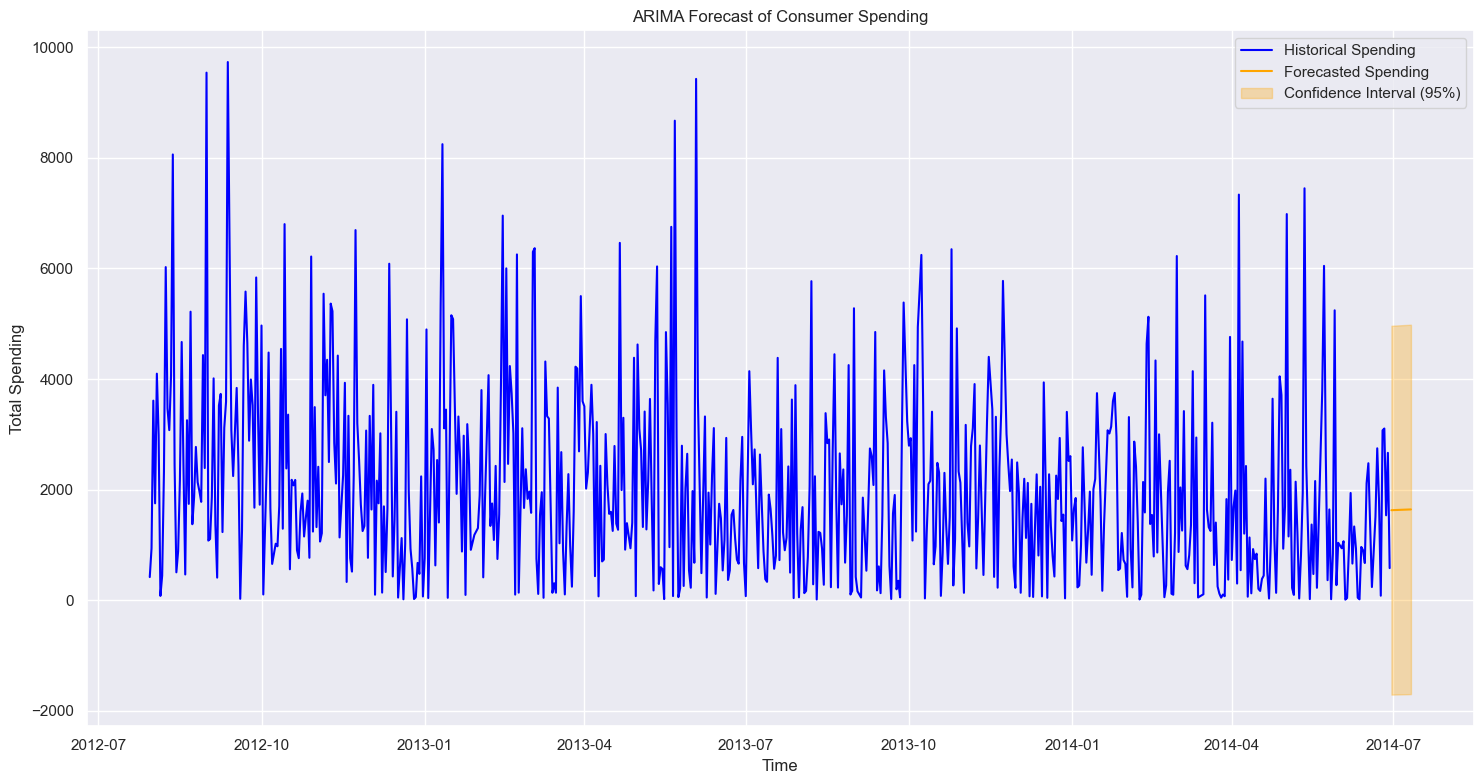

In [170]:
# Assuming 'time_series_data' is your DataFrame containing the historical data
# and 'forecast_df' contains the forecasted values and confidence intervals

plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(time_series_data.index, time_series_data['Total_Spending'], label='Historical Spending', color='blue')

# Plot the forecasted values
plt.plot(forecast_df.index, forecast_df['Forecasted Spending'], label='Forecasted Spending', color='orange')

# Plot confidence intervals
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='orange', alpha=0.3, label='Confidence Interval (95%)')

plt.title('ARIMA Forecast of Consumer Spending')
plt.xlabel('Time')
plt.ylabel('Total Spending')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
